# Support Vector Machines 
#### Submitted by Maria Eloisa H. Garcia
---
## Instructions
1. Use any dfset from https://archive.ics.uci.edu/dfsets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dfset otherwise no points will be given, so you need to discuss with your classmate.

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
headers = ["area", "perimeter", "compactness", "length", "width", "assymetry", "groove_len", "label"]
df = pd.read_csv('seeds_dataset.txt', delimiter=r'\s+', header=None, names=headers)

df.head()

area  perimeter  compactness  length  width  assymetry  groove_len  label
0  15.26      14.84       0.8710   5.763  3.312      2.221       5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018       4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699       4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259       4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355       5.175      1

**TASK: Take 10 moderately sized subsamples your dfset and create a correlation plot for each subsample**

In [367]:
num_subsamples = 10
size = len(df) // num_subsamples

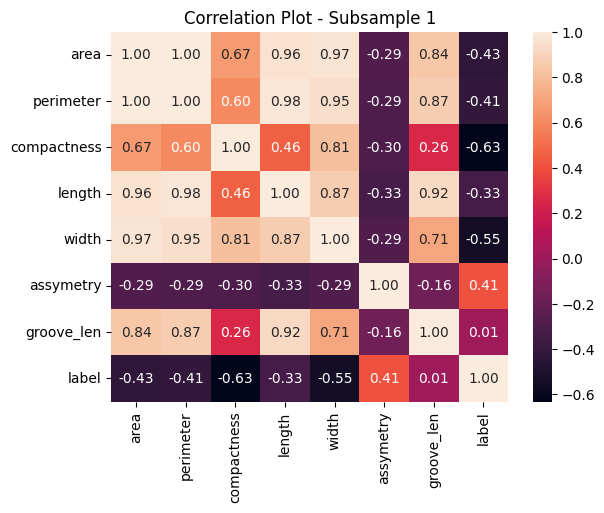

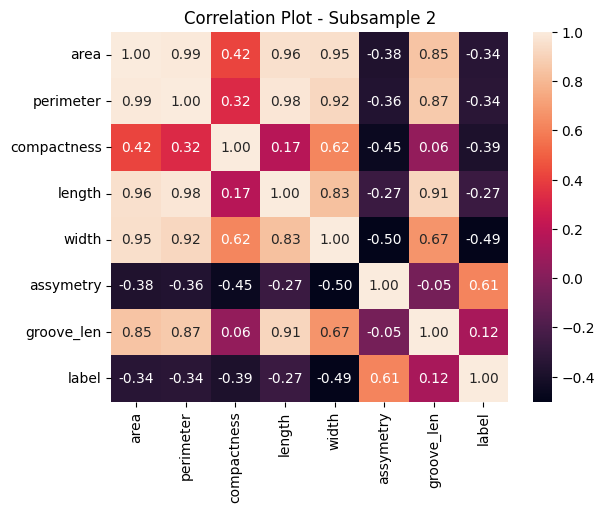

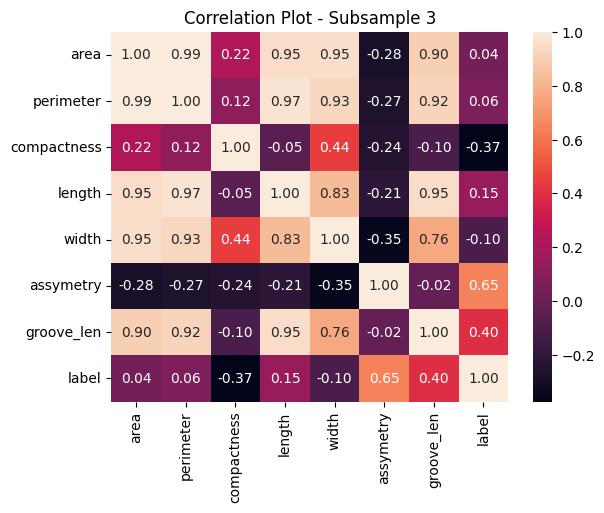

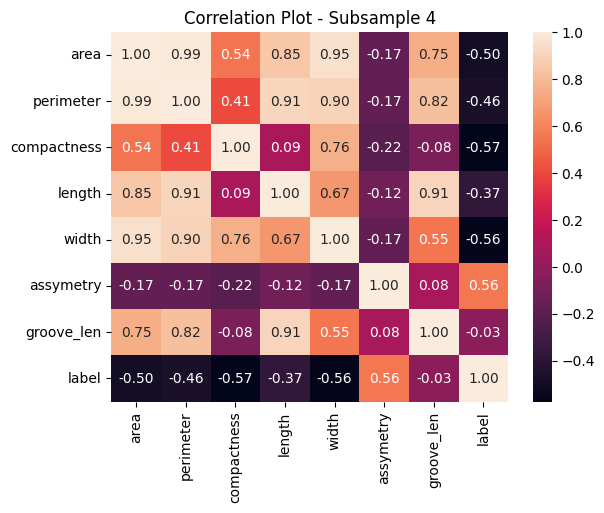

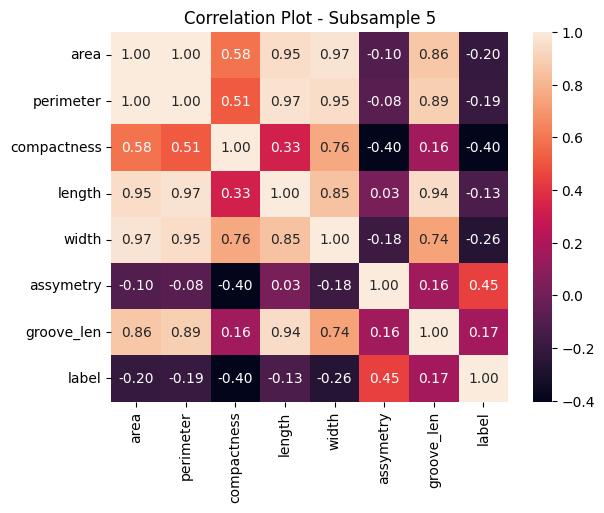

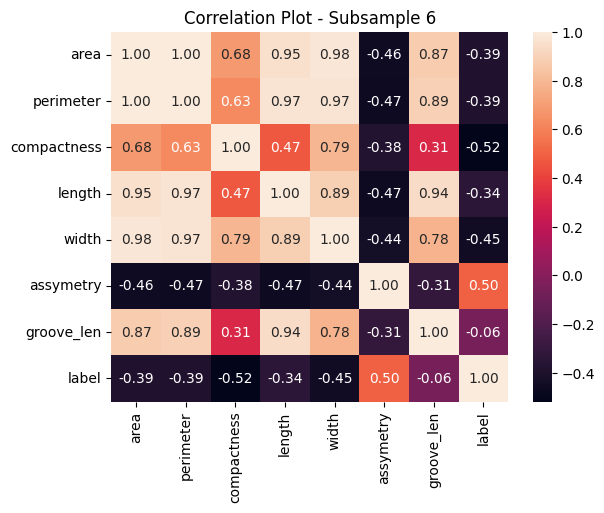

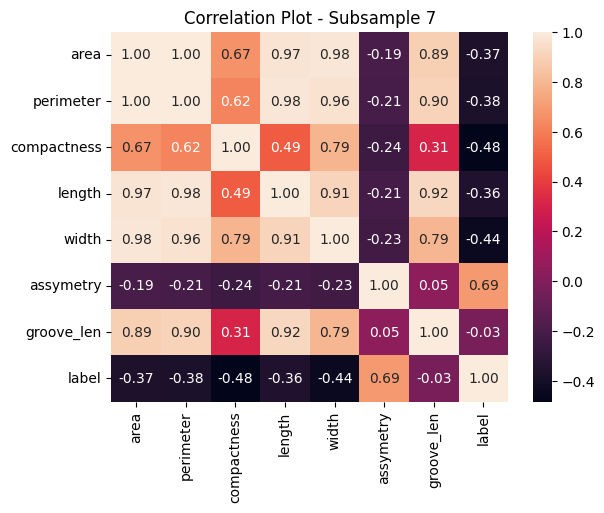

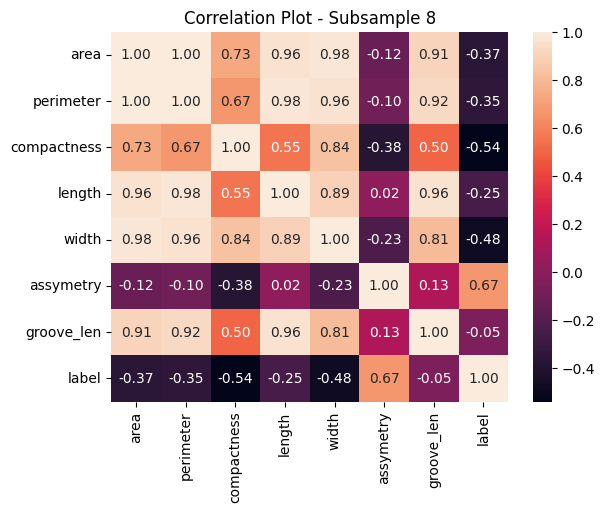

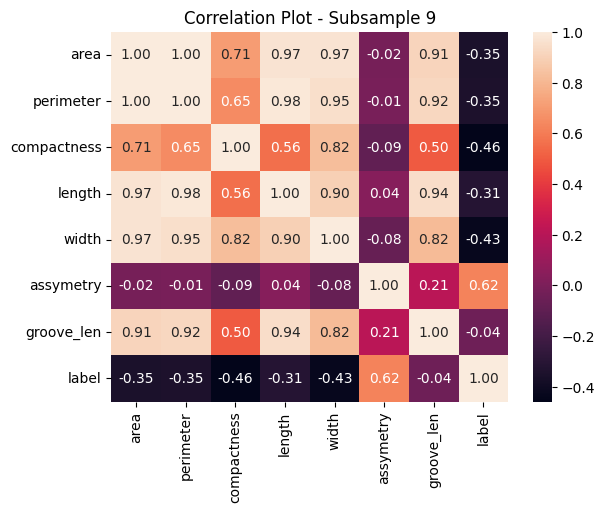

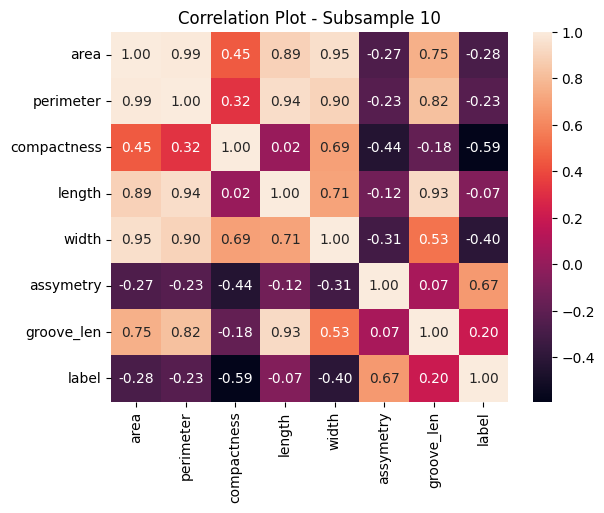

In [368]:
for i in range(num_subsamples):
    subsample = df.sample(n = size)
    corr = subsample.corr()

    sns.heatmap(corr, annot = True, fmt=".2f")
    plt.title(f'Correlation Plot - Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**

**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

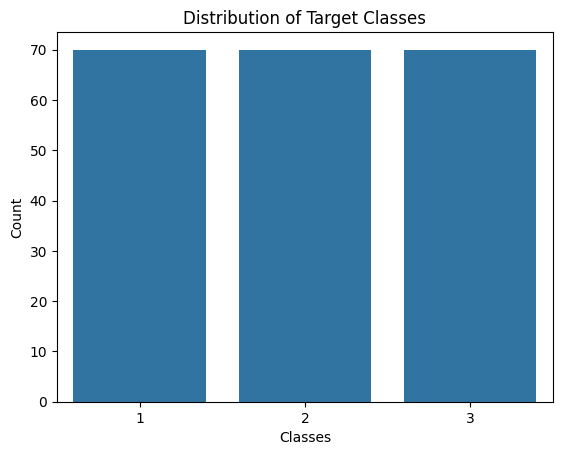

In [369]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Target Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

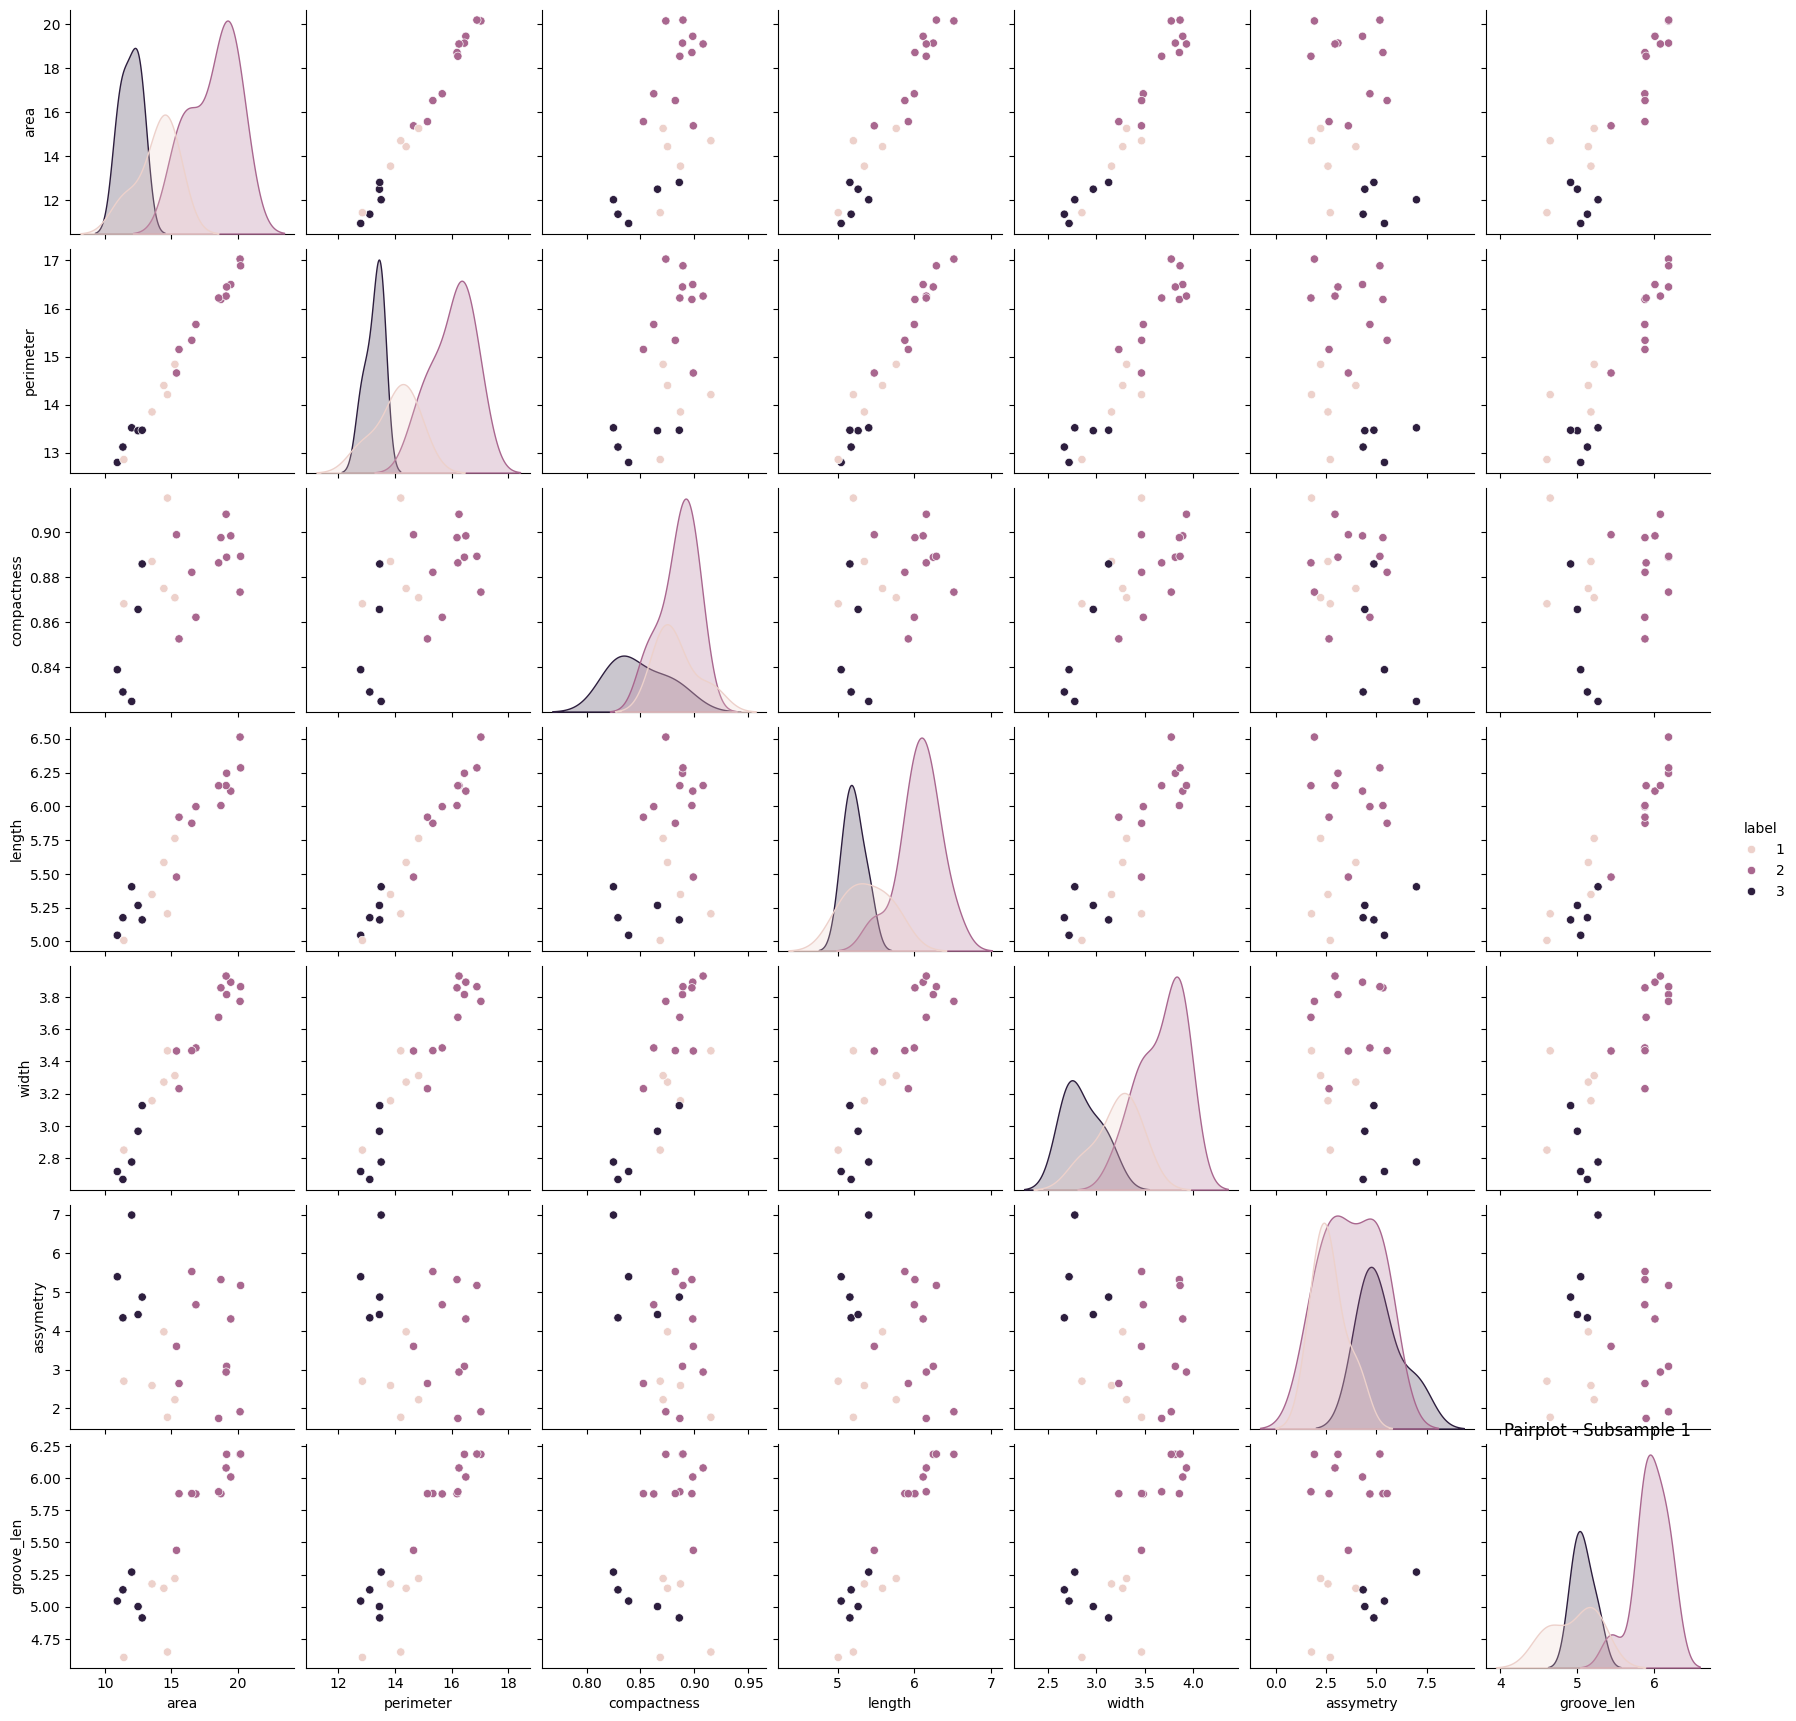

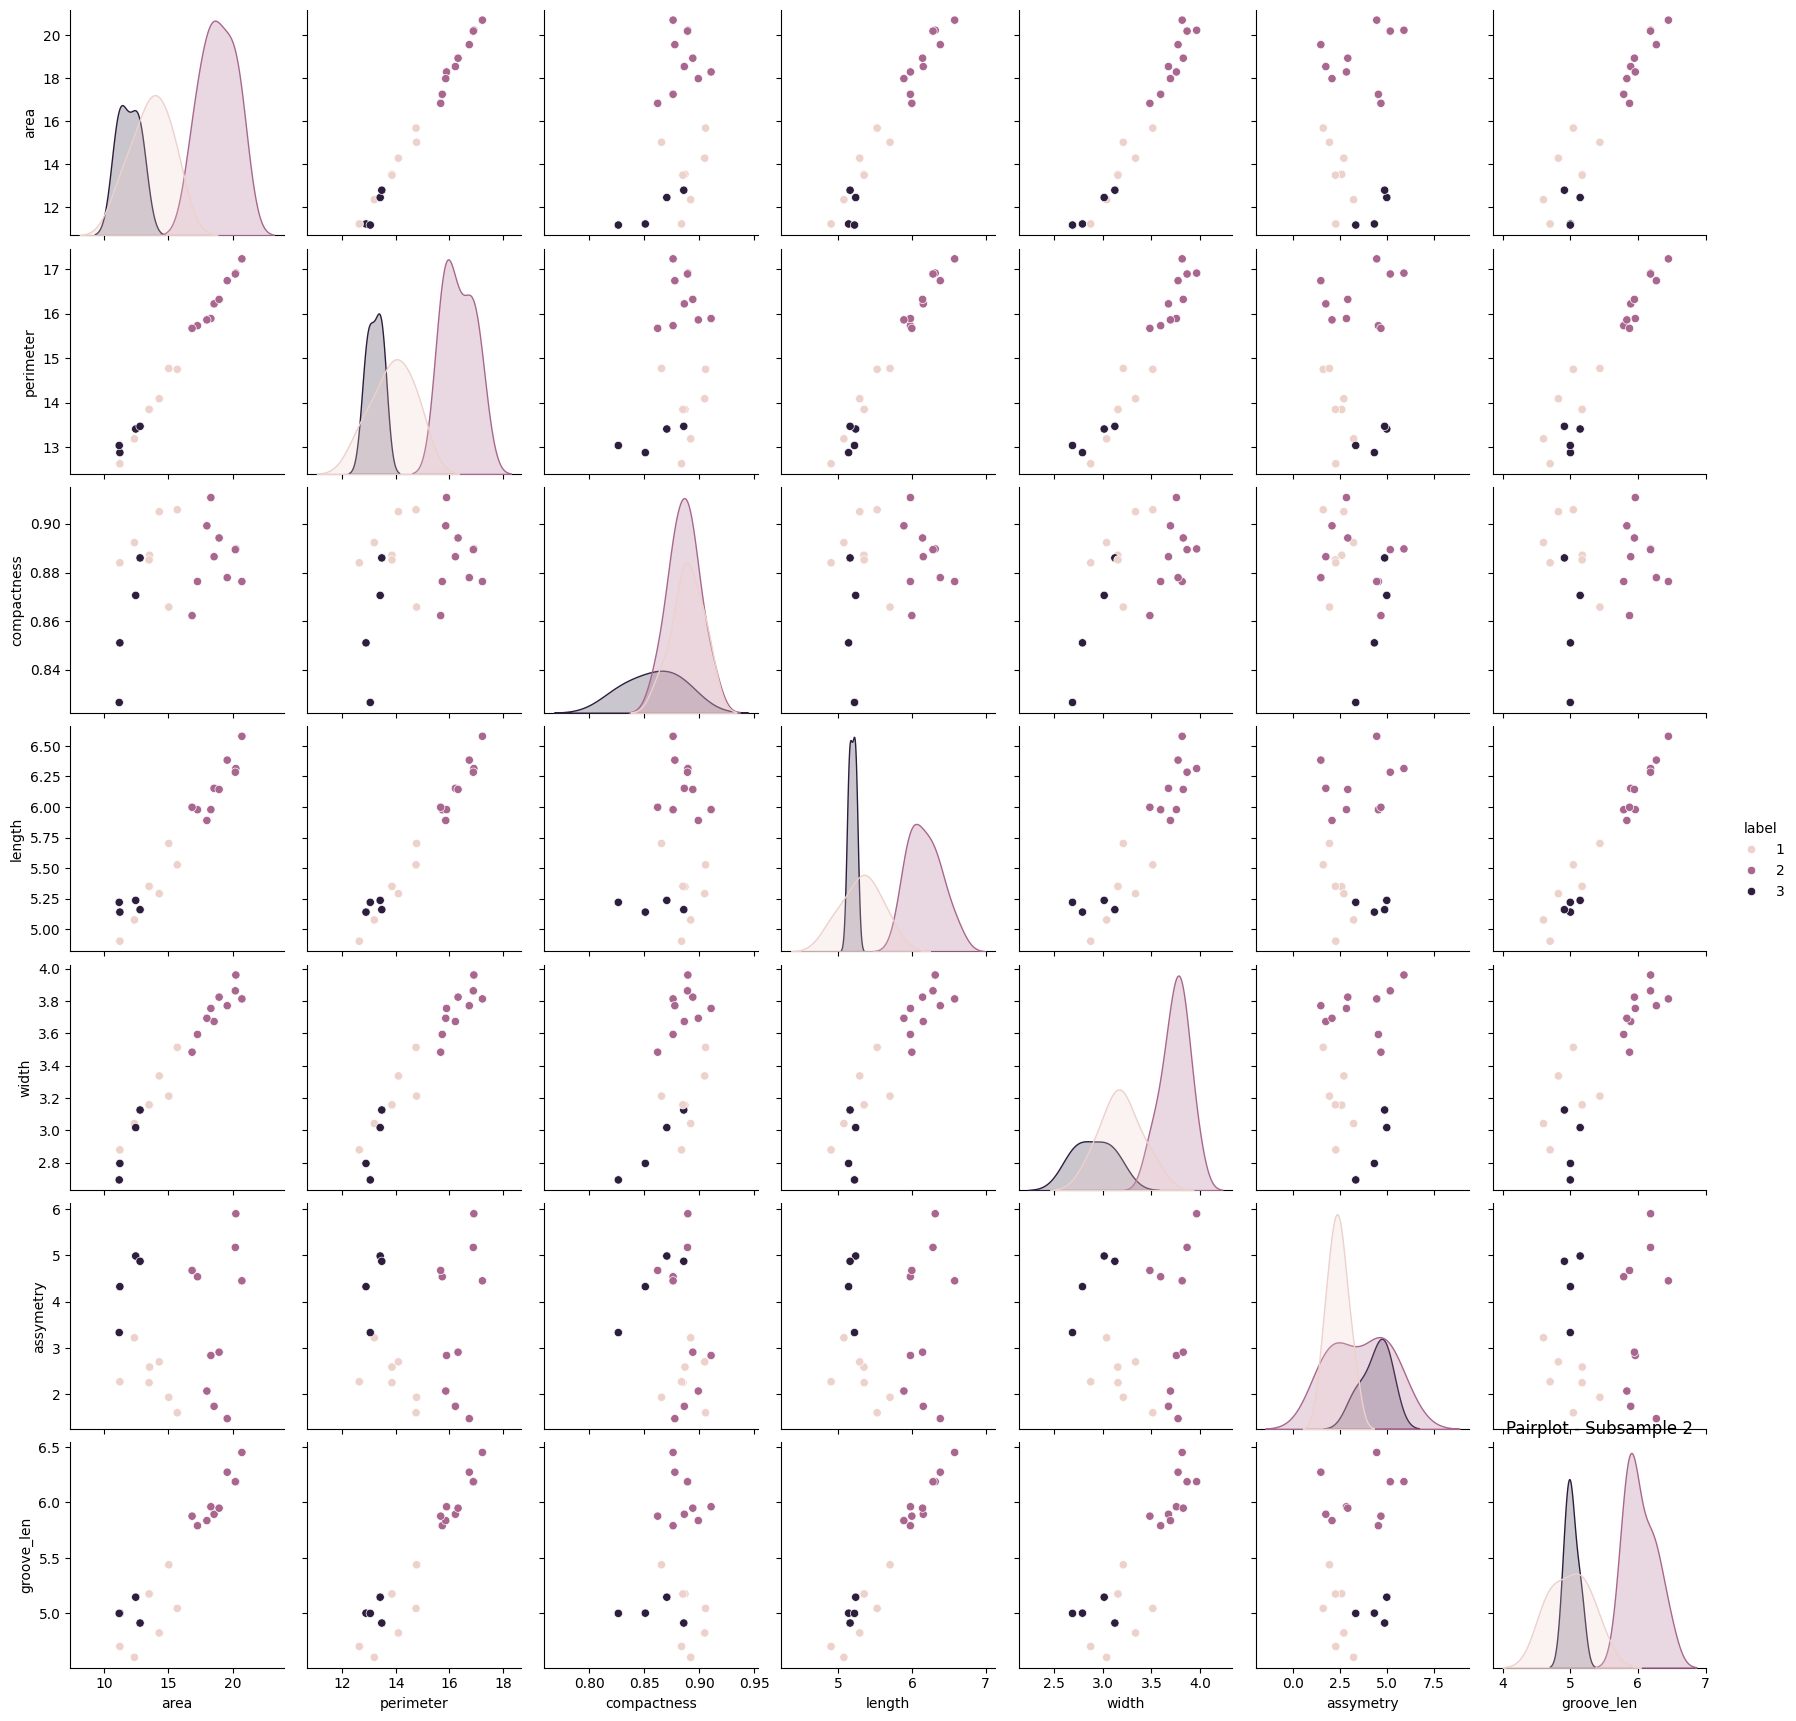

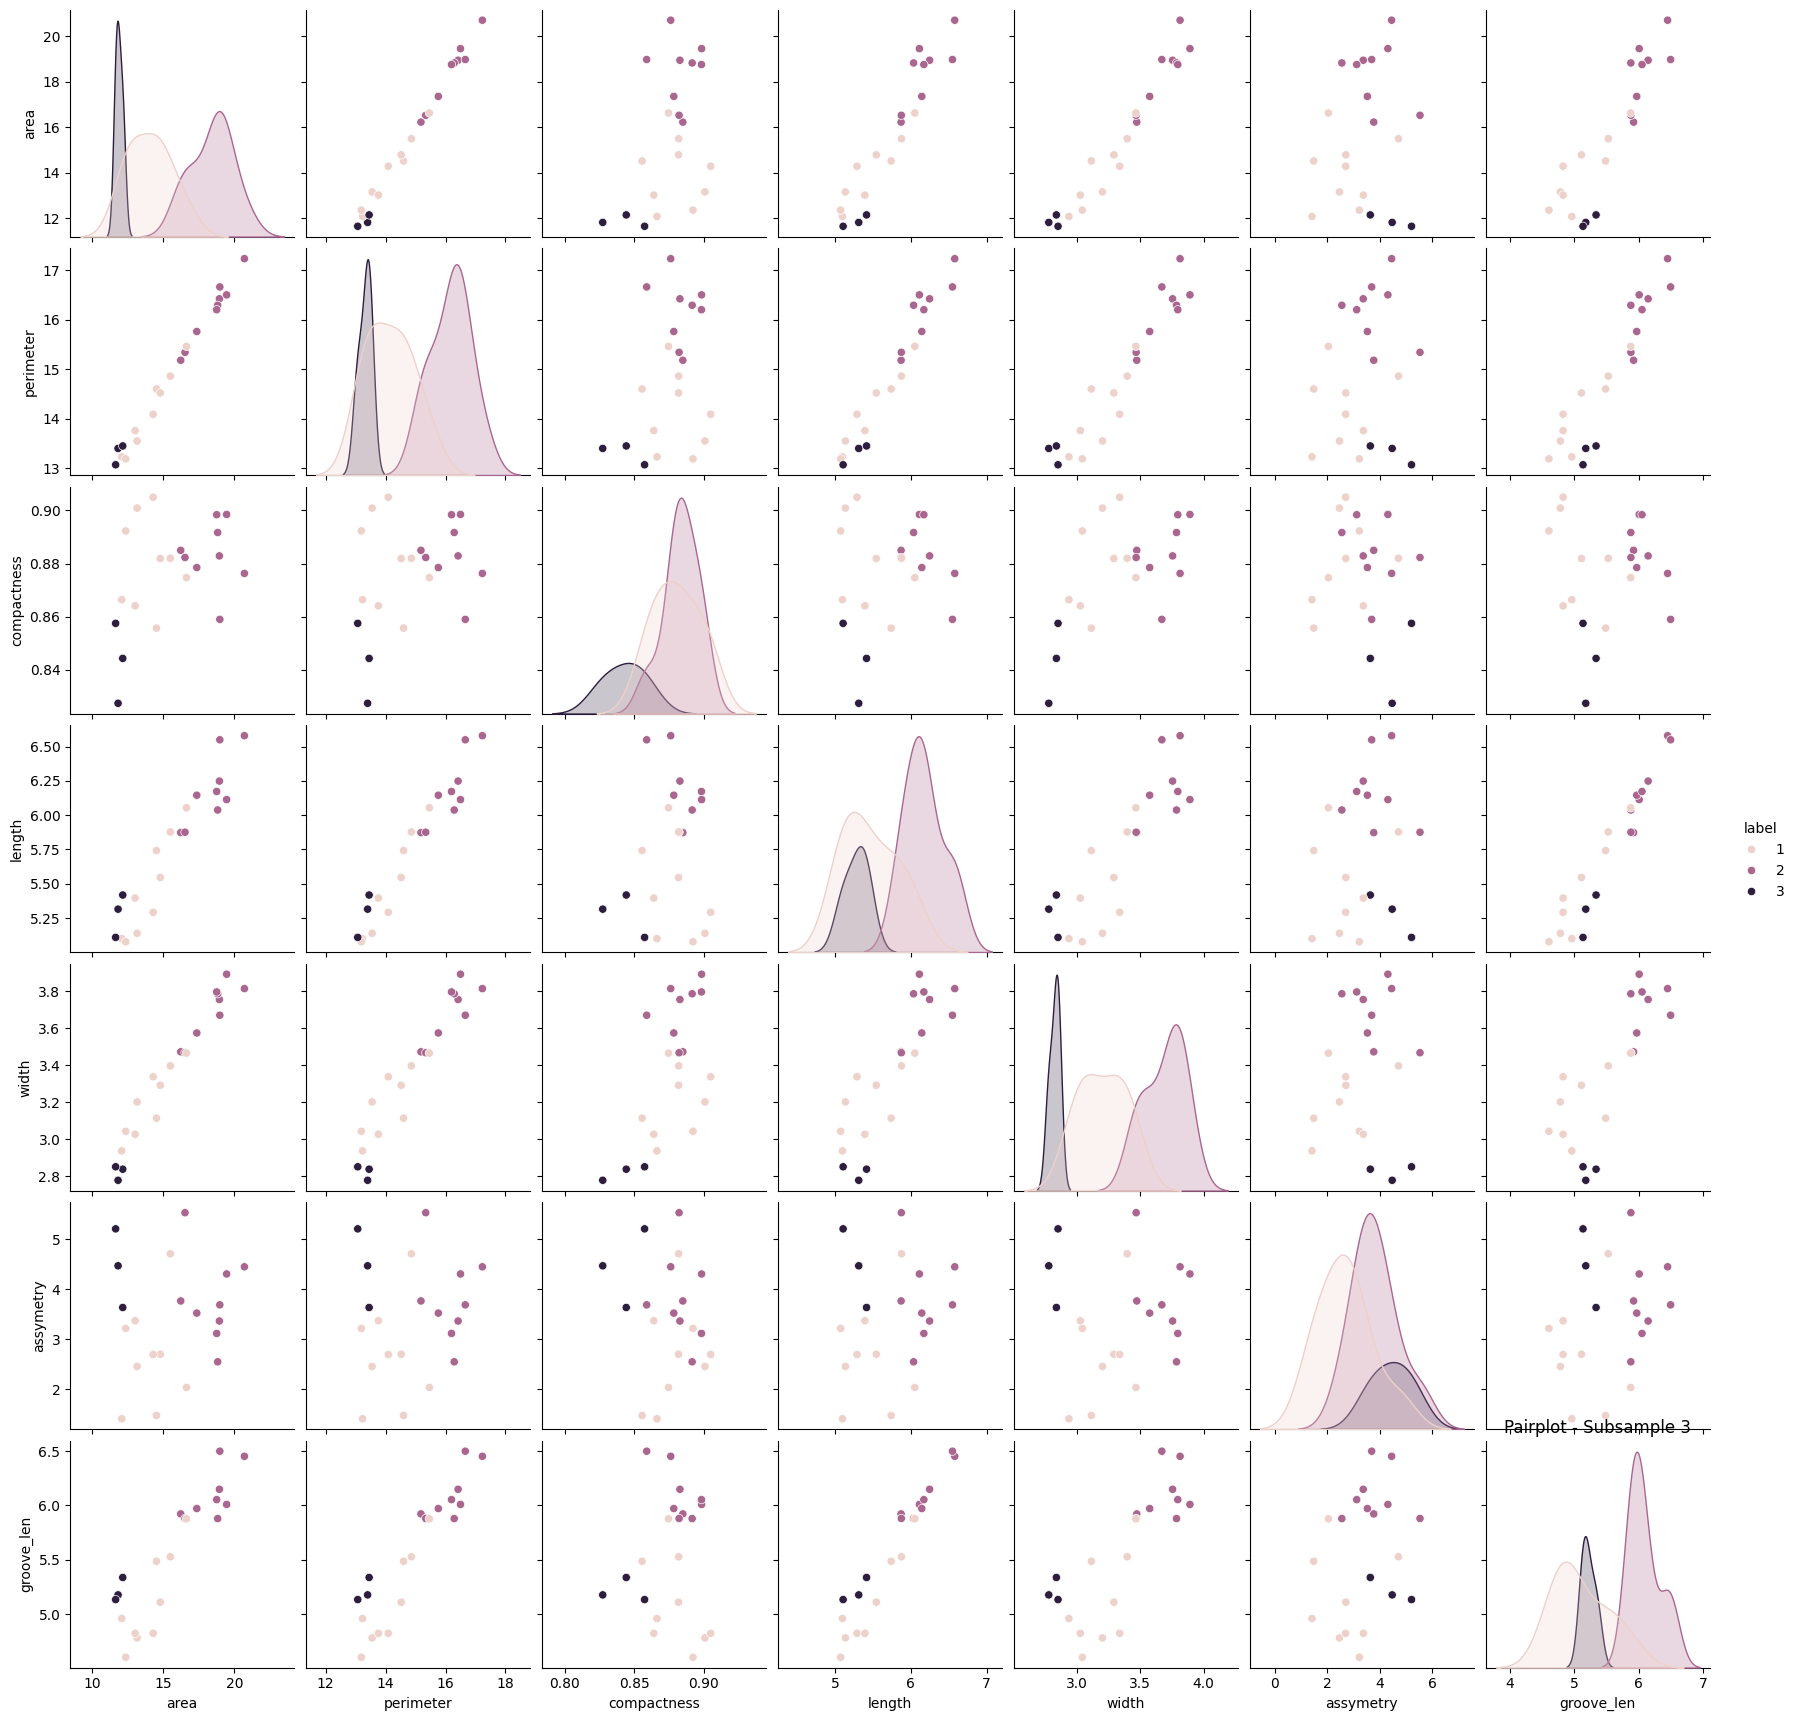

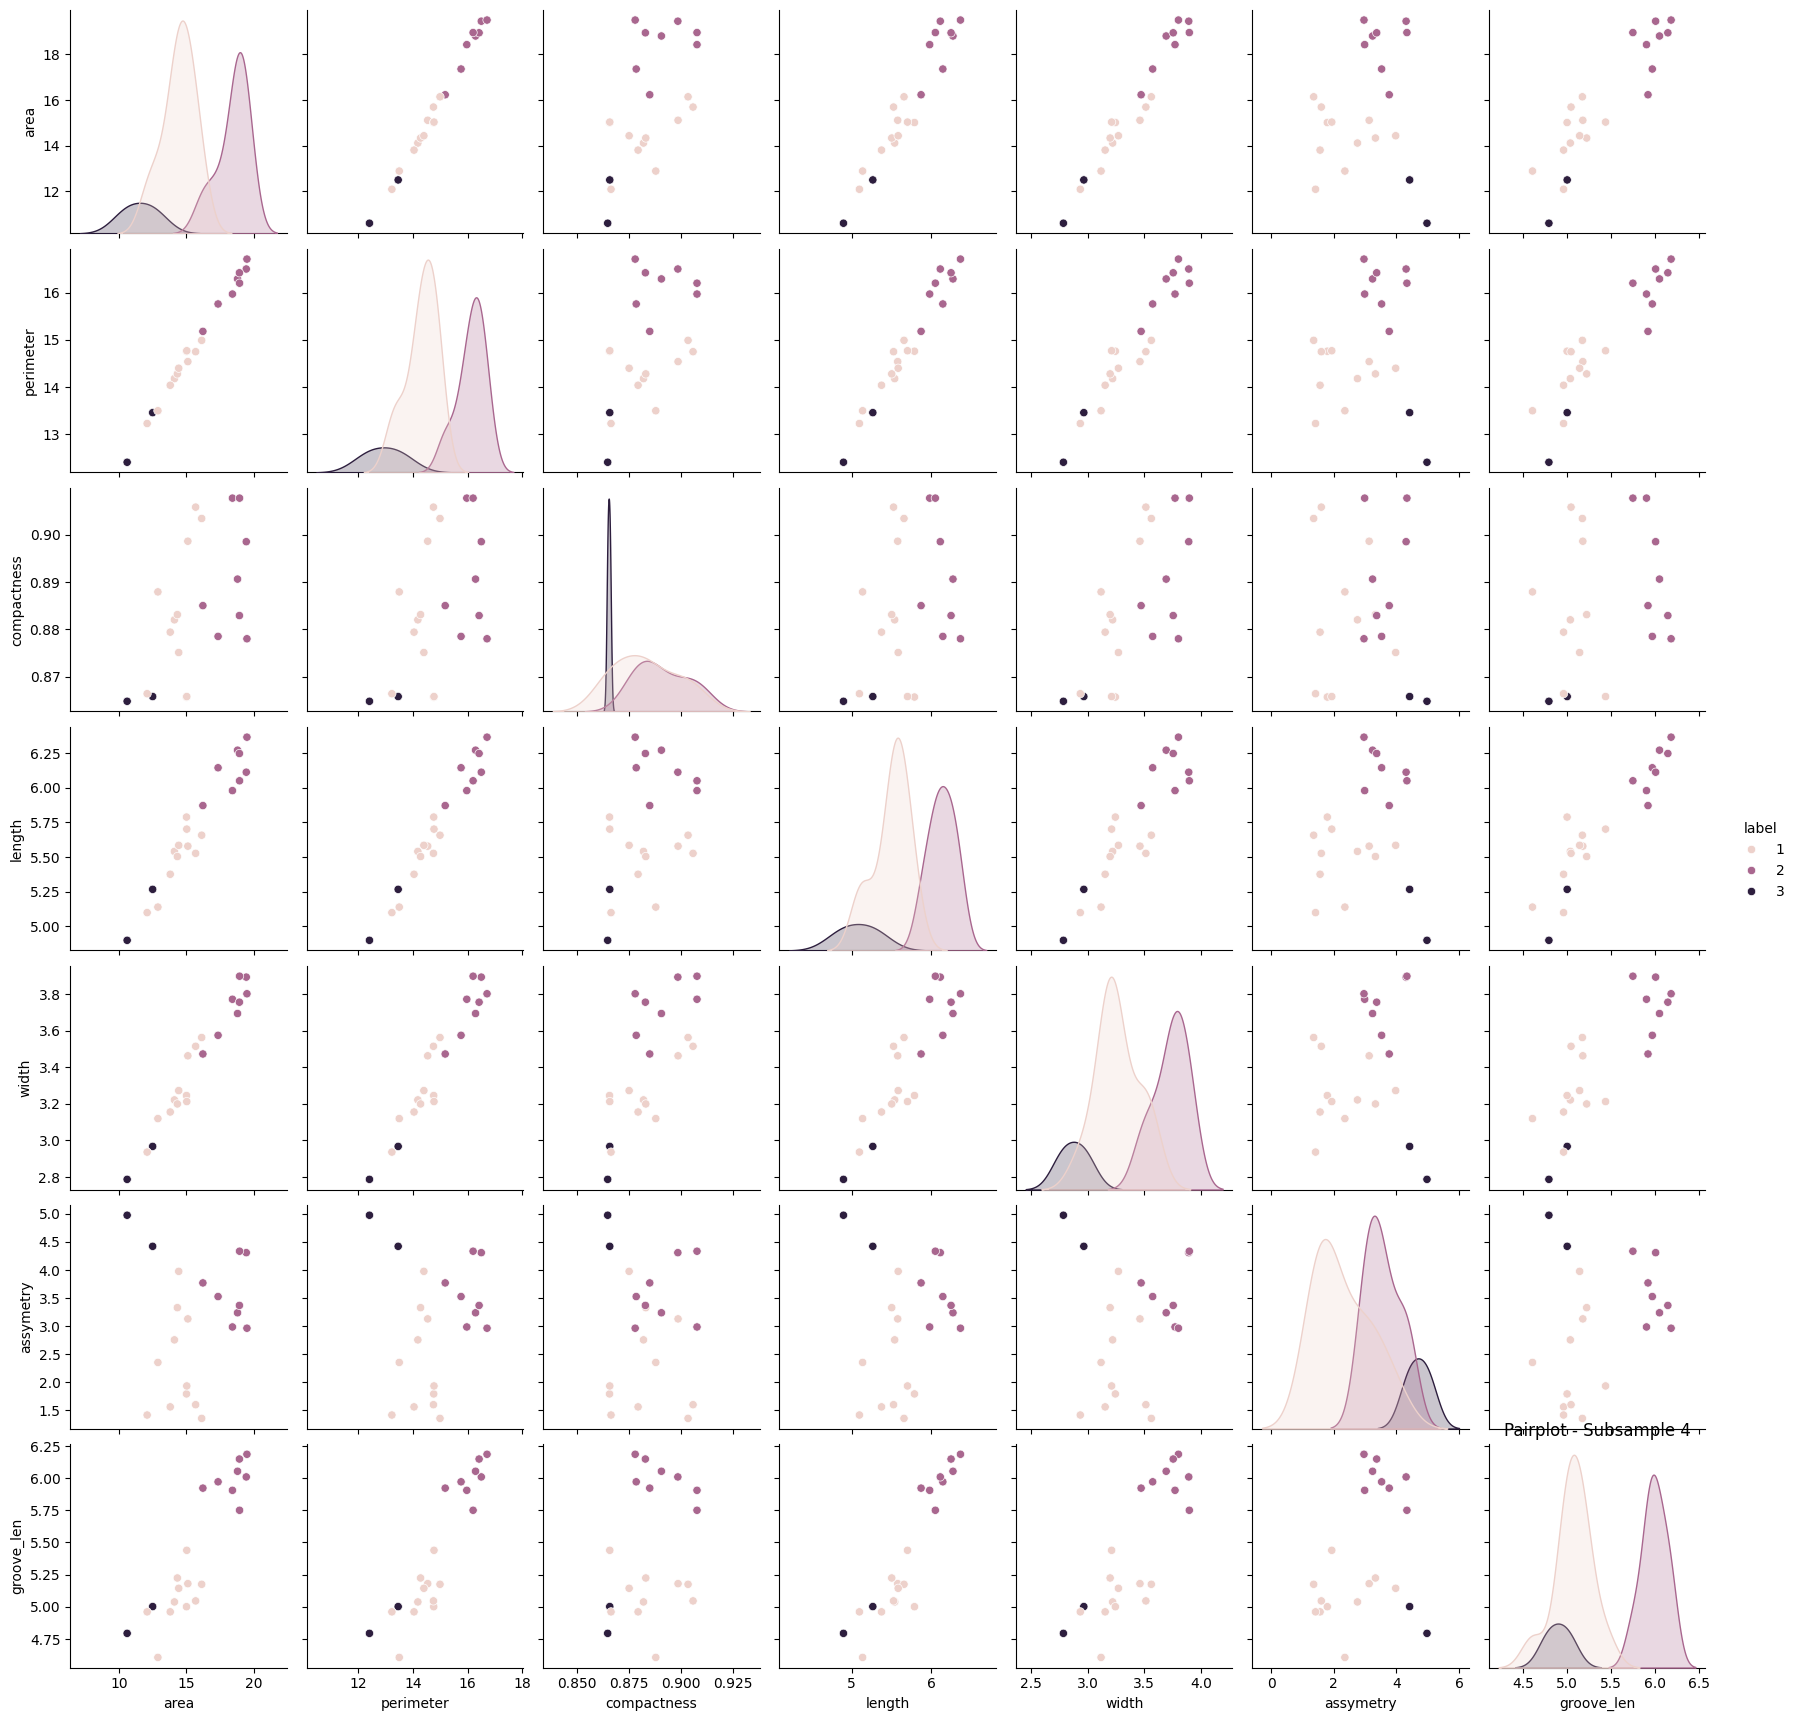

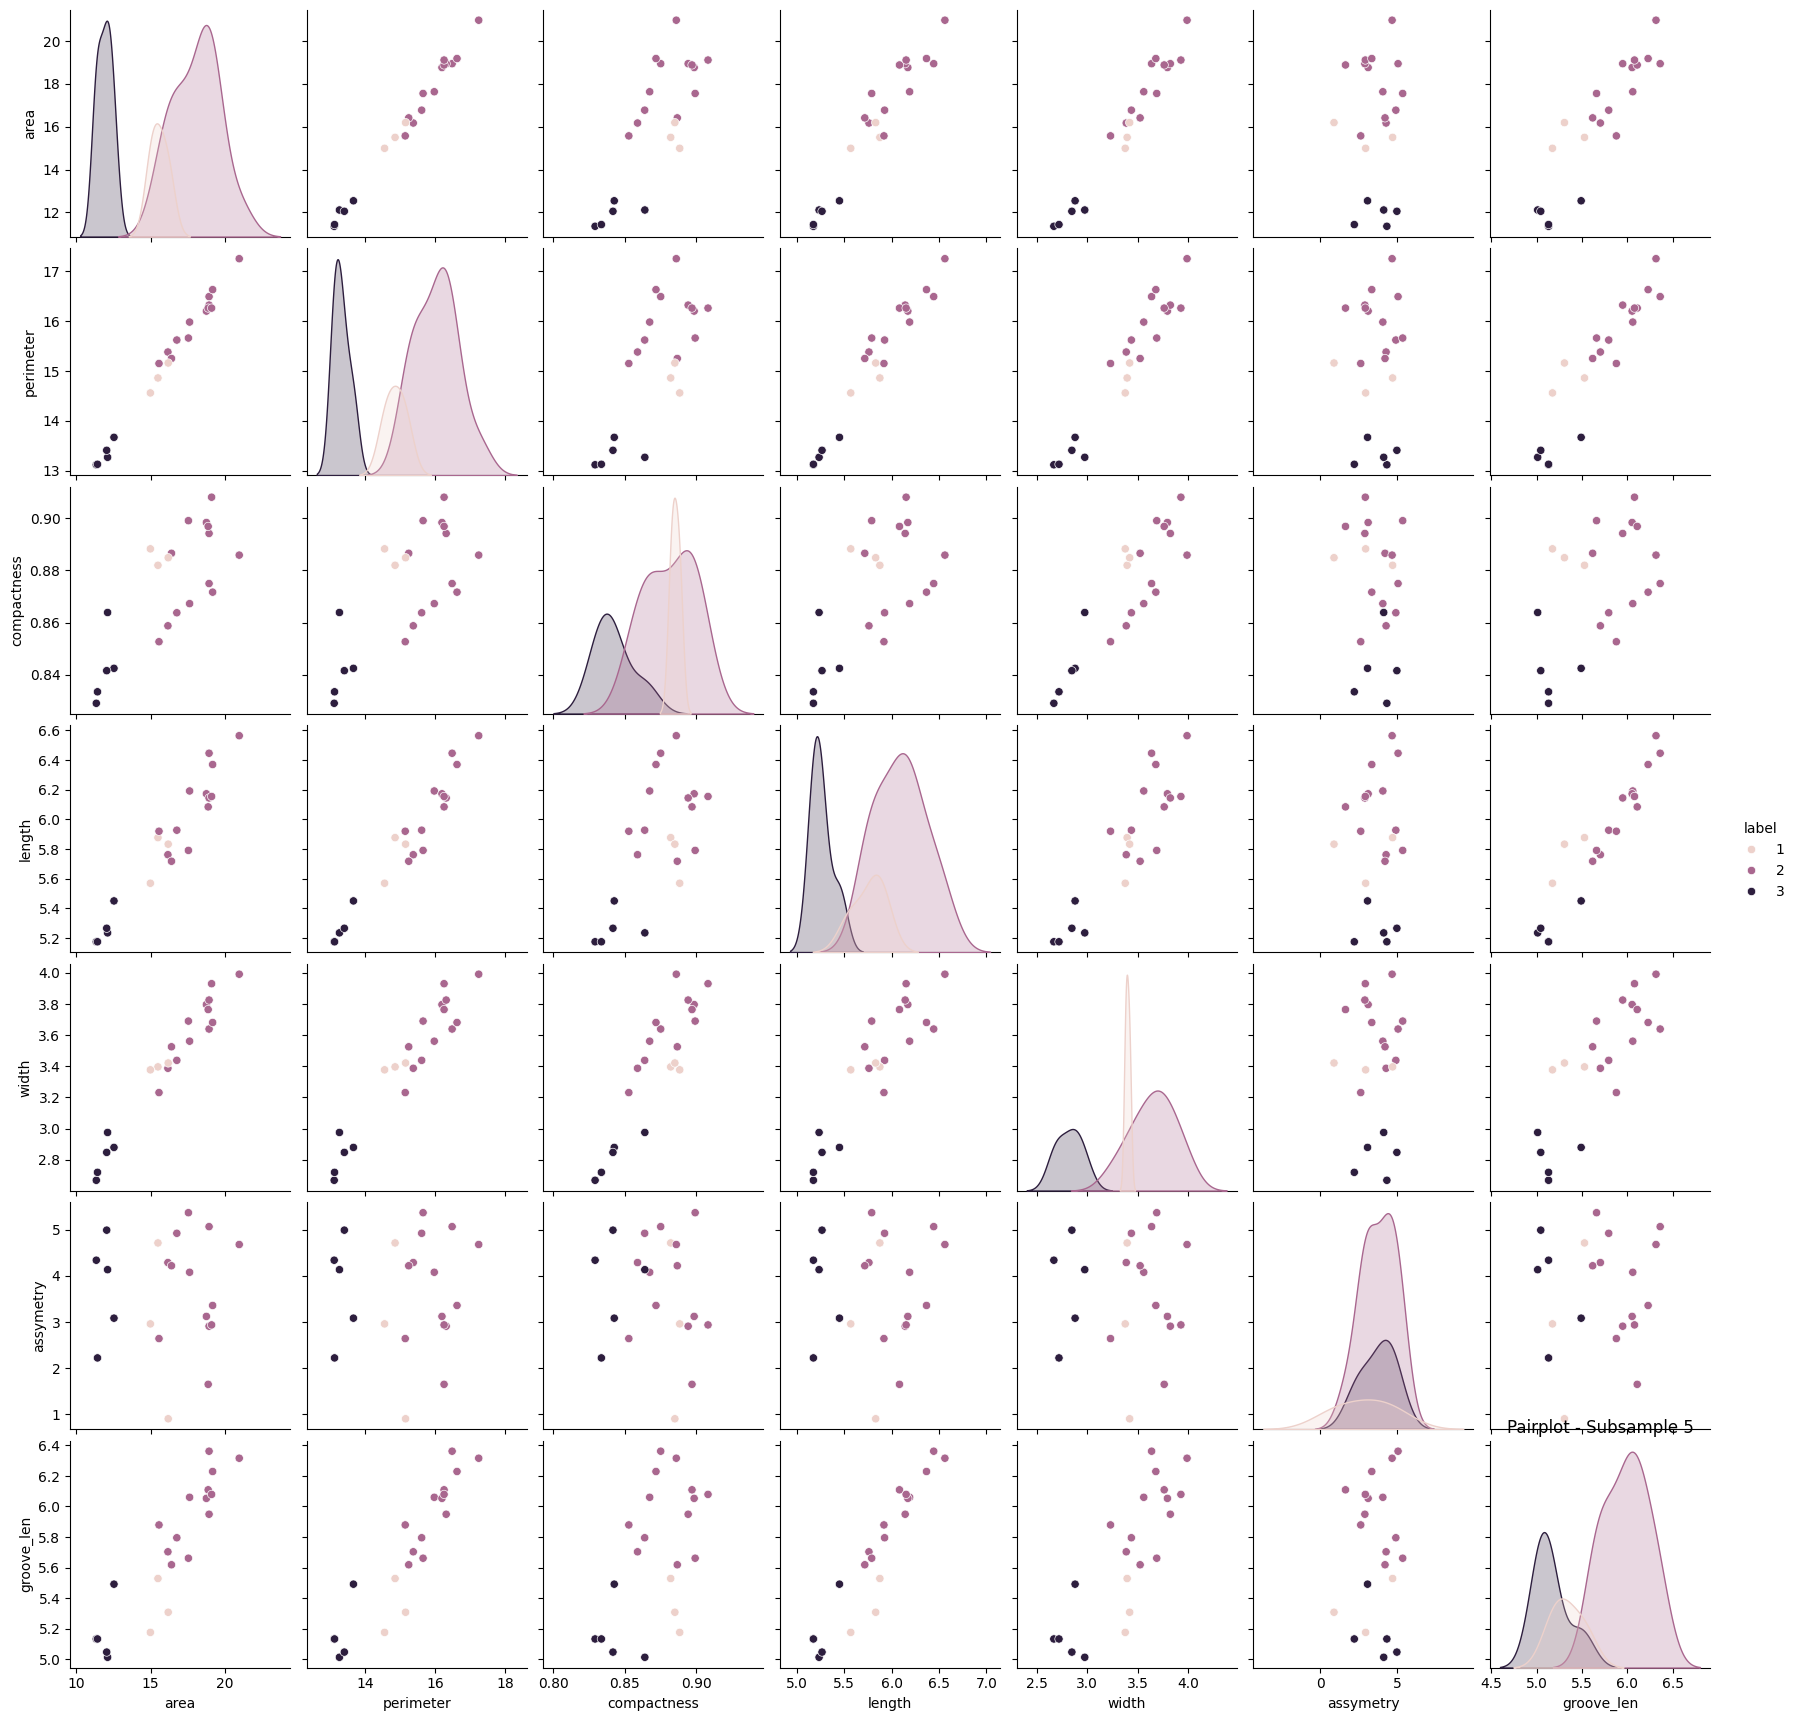

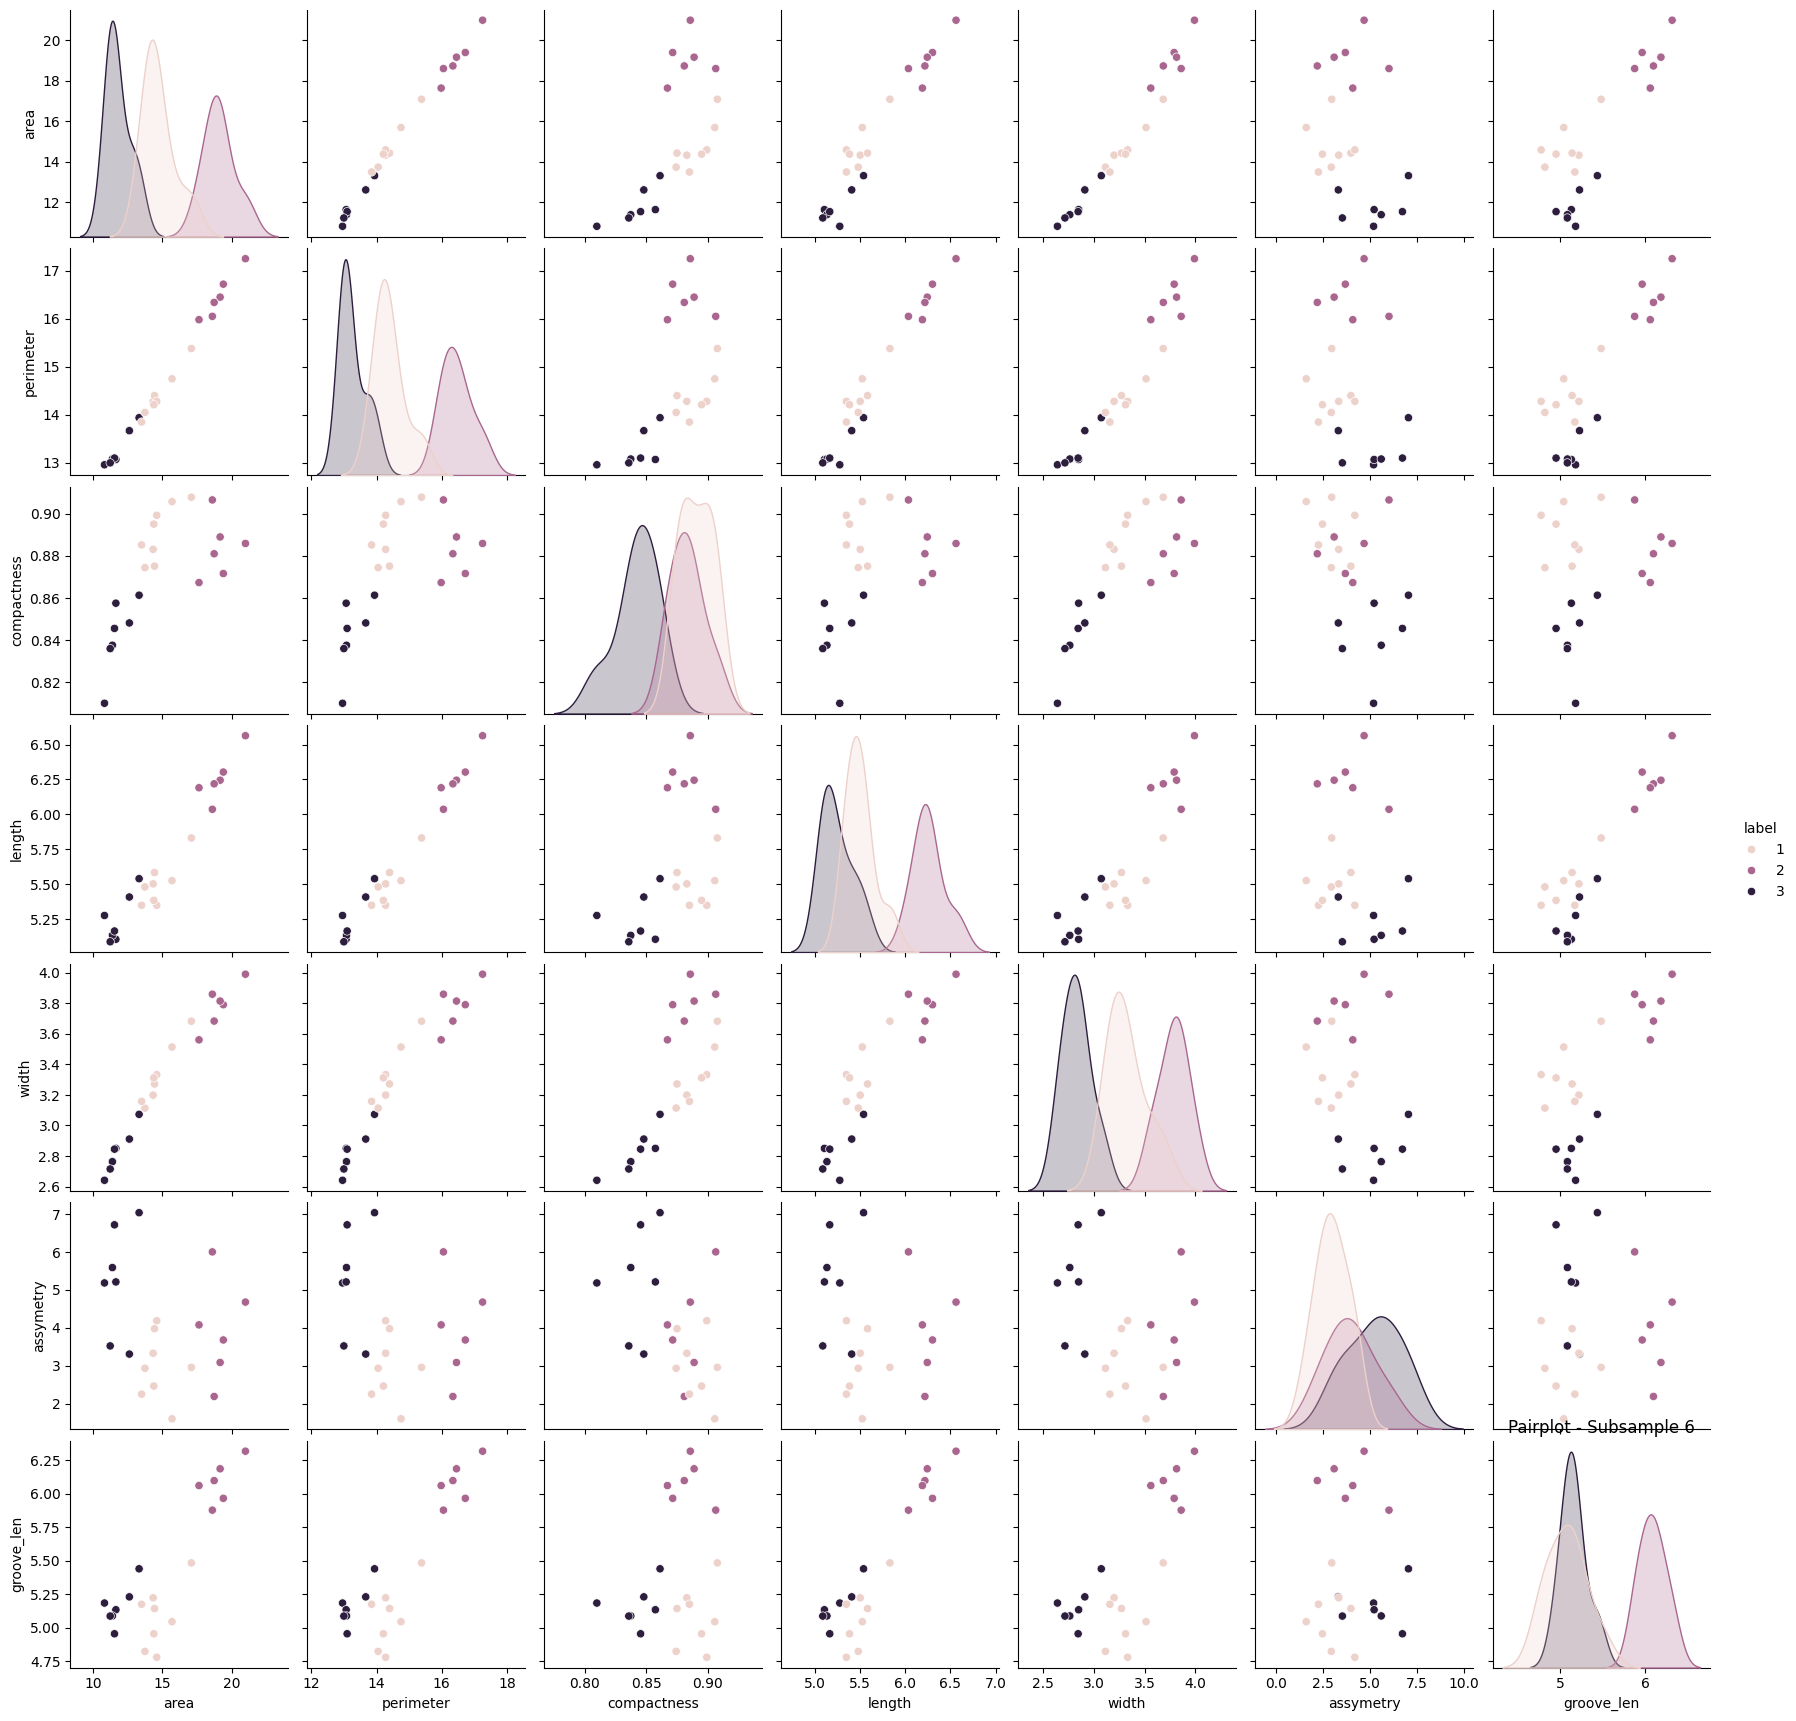

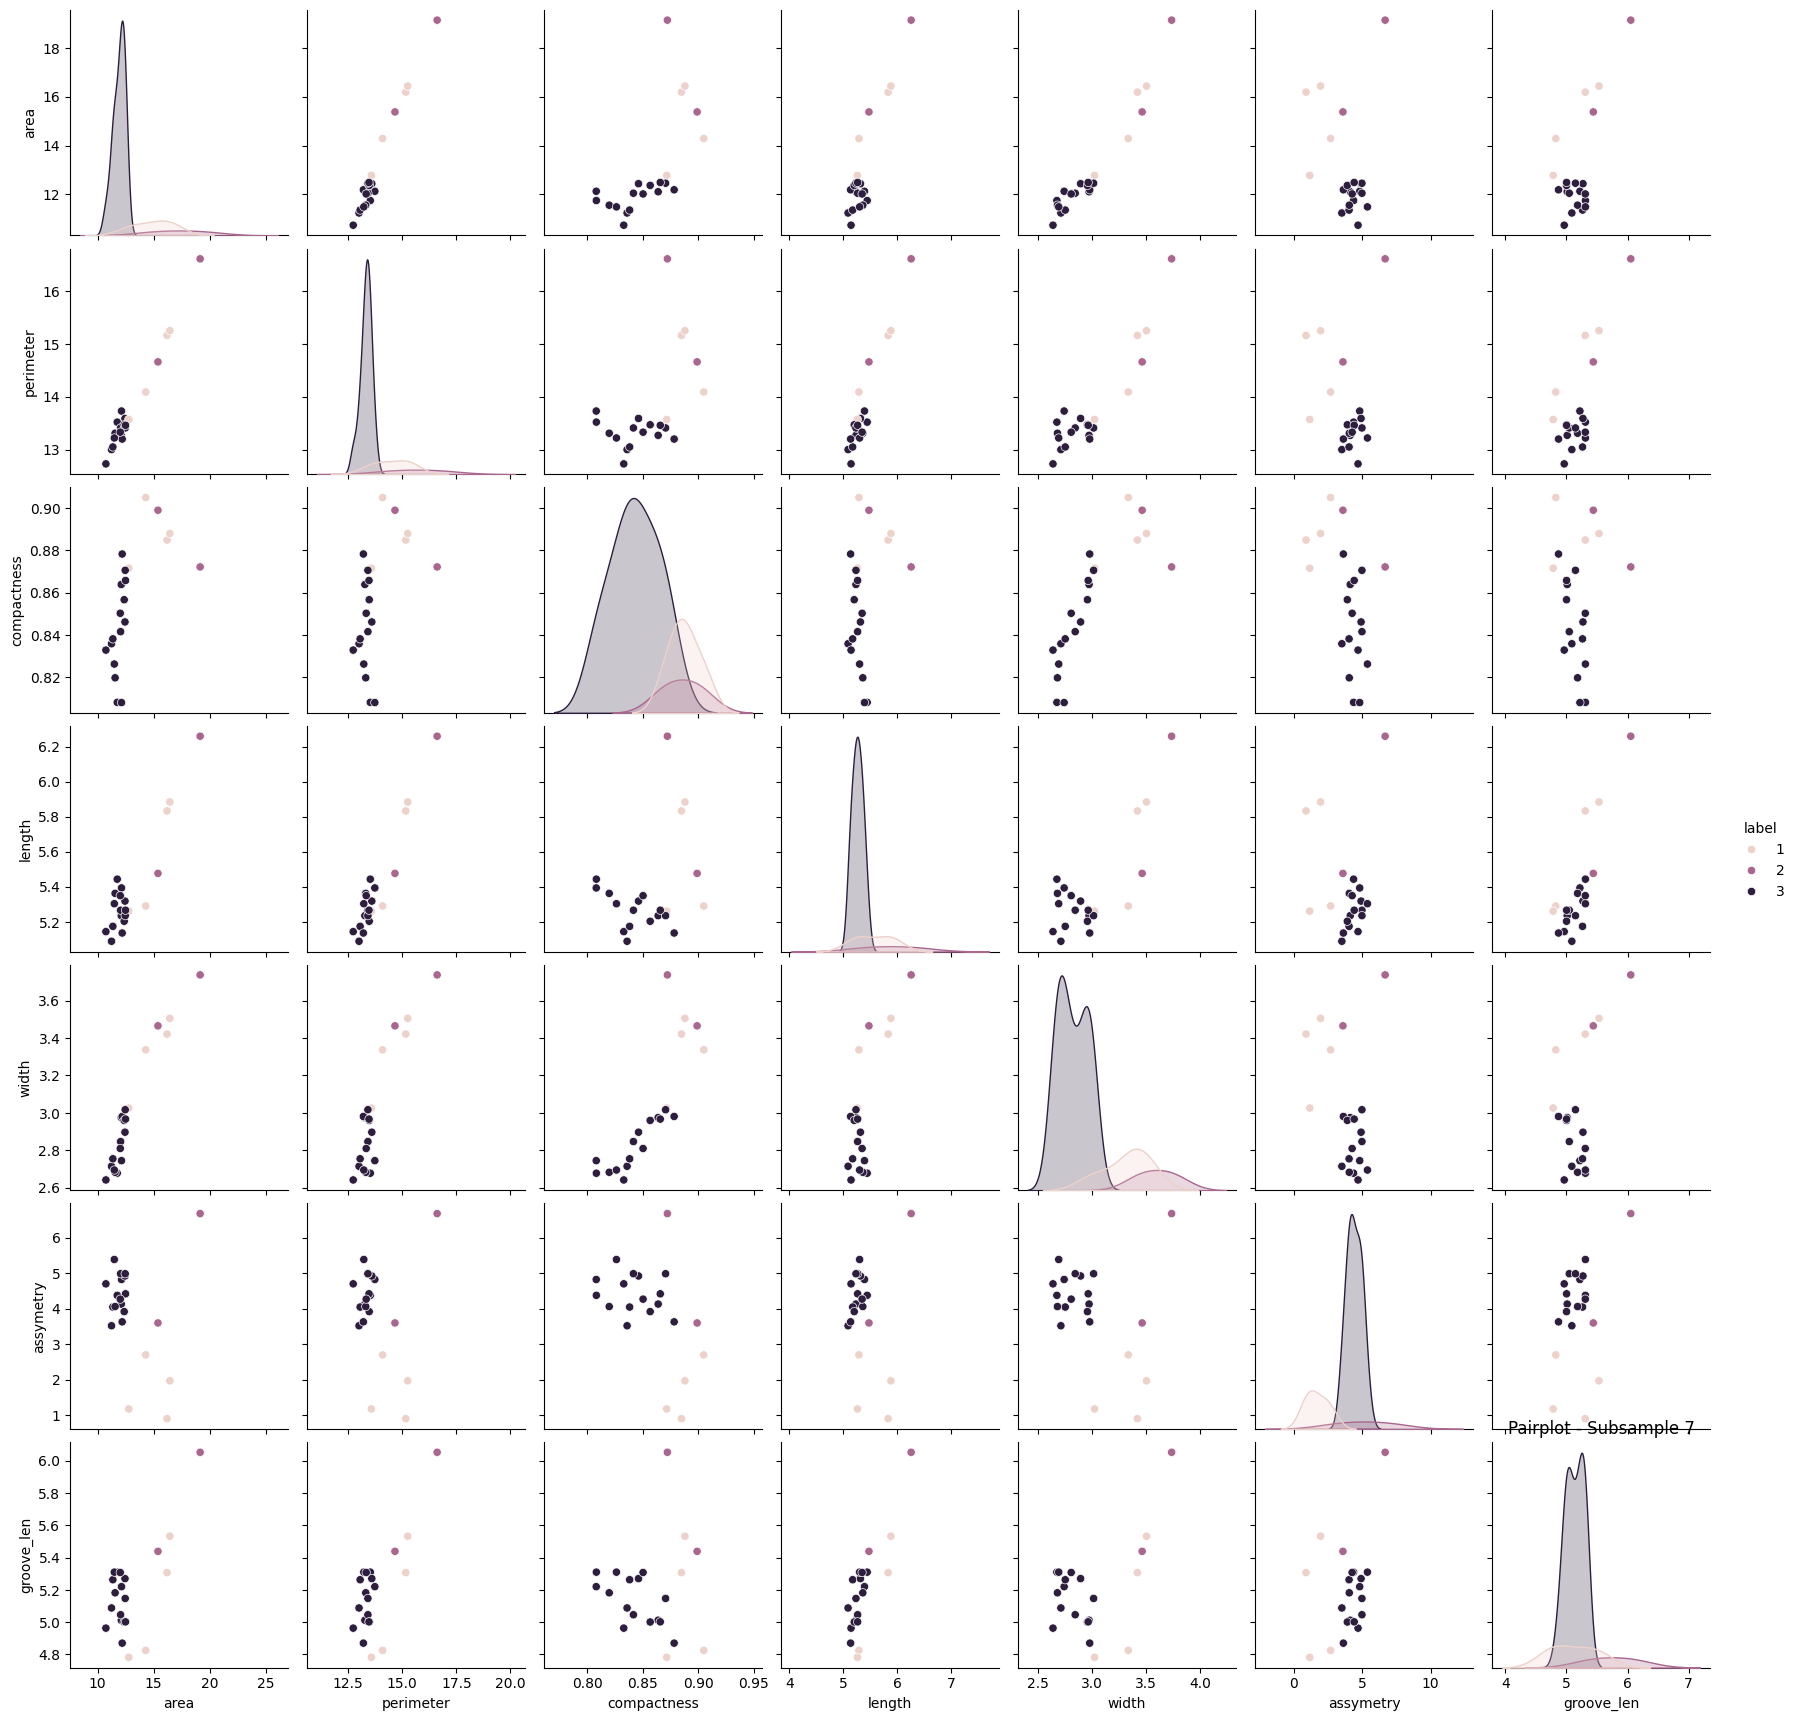

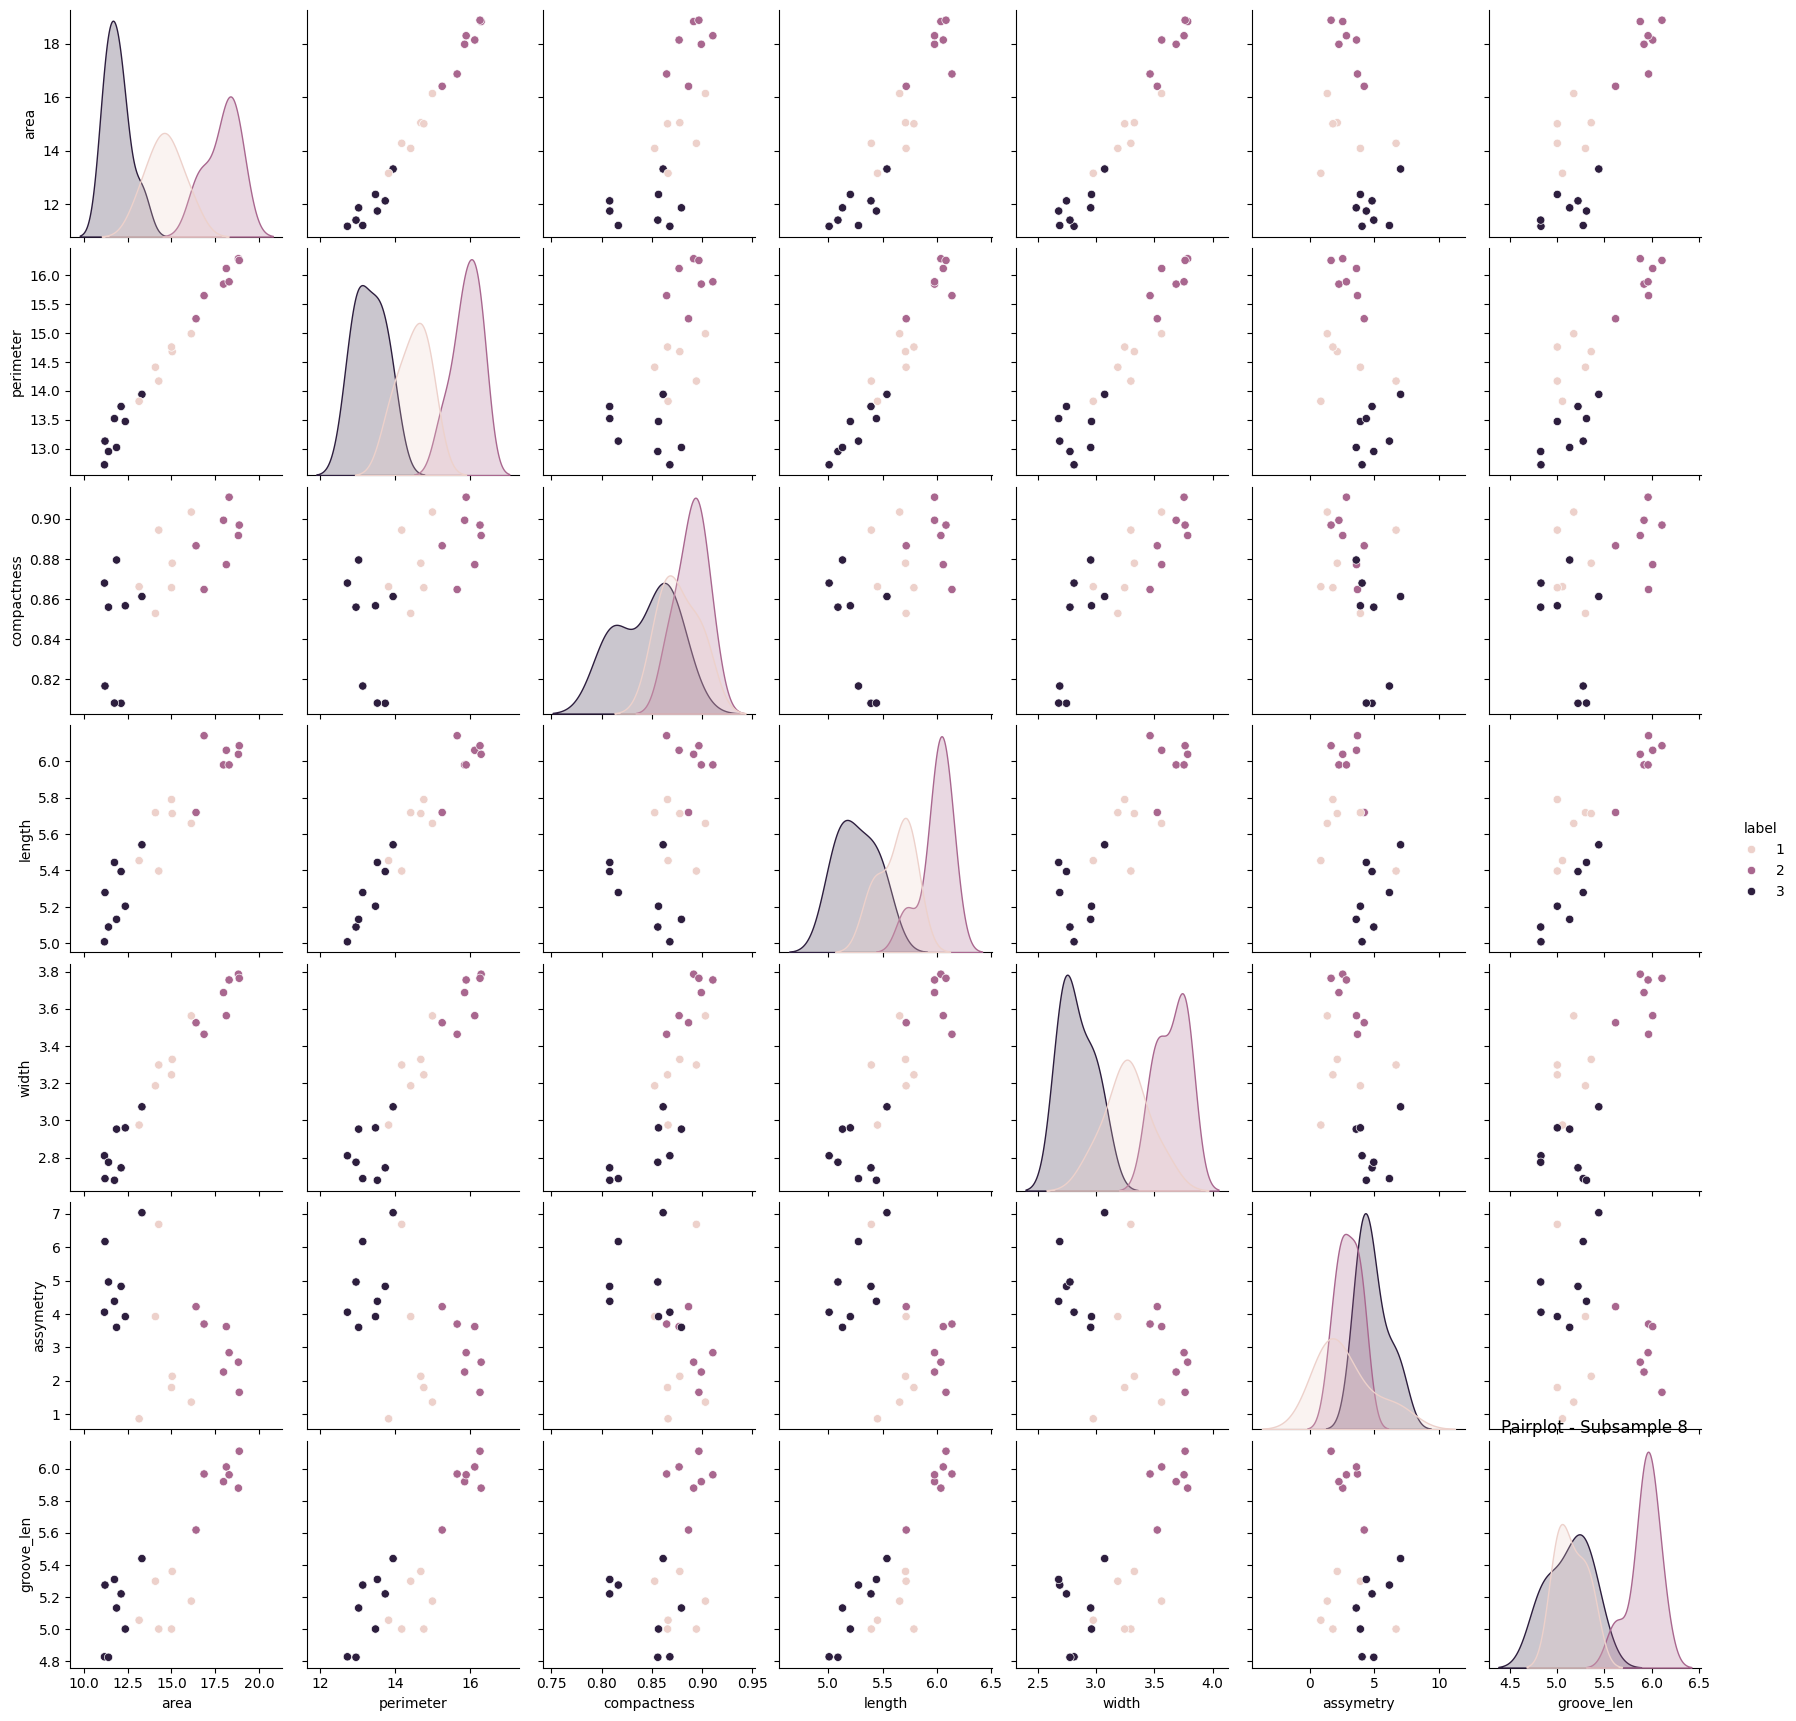

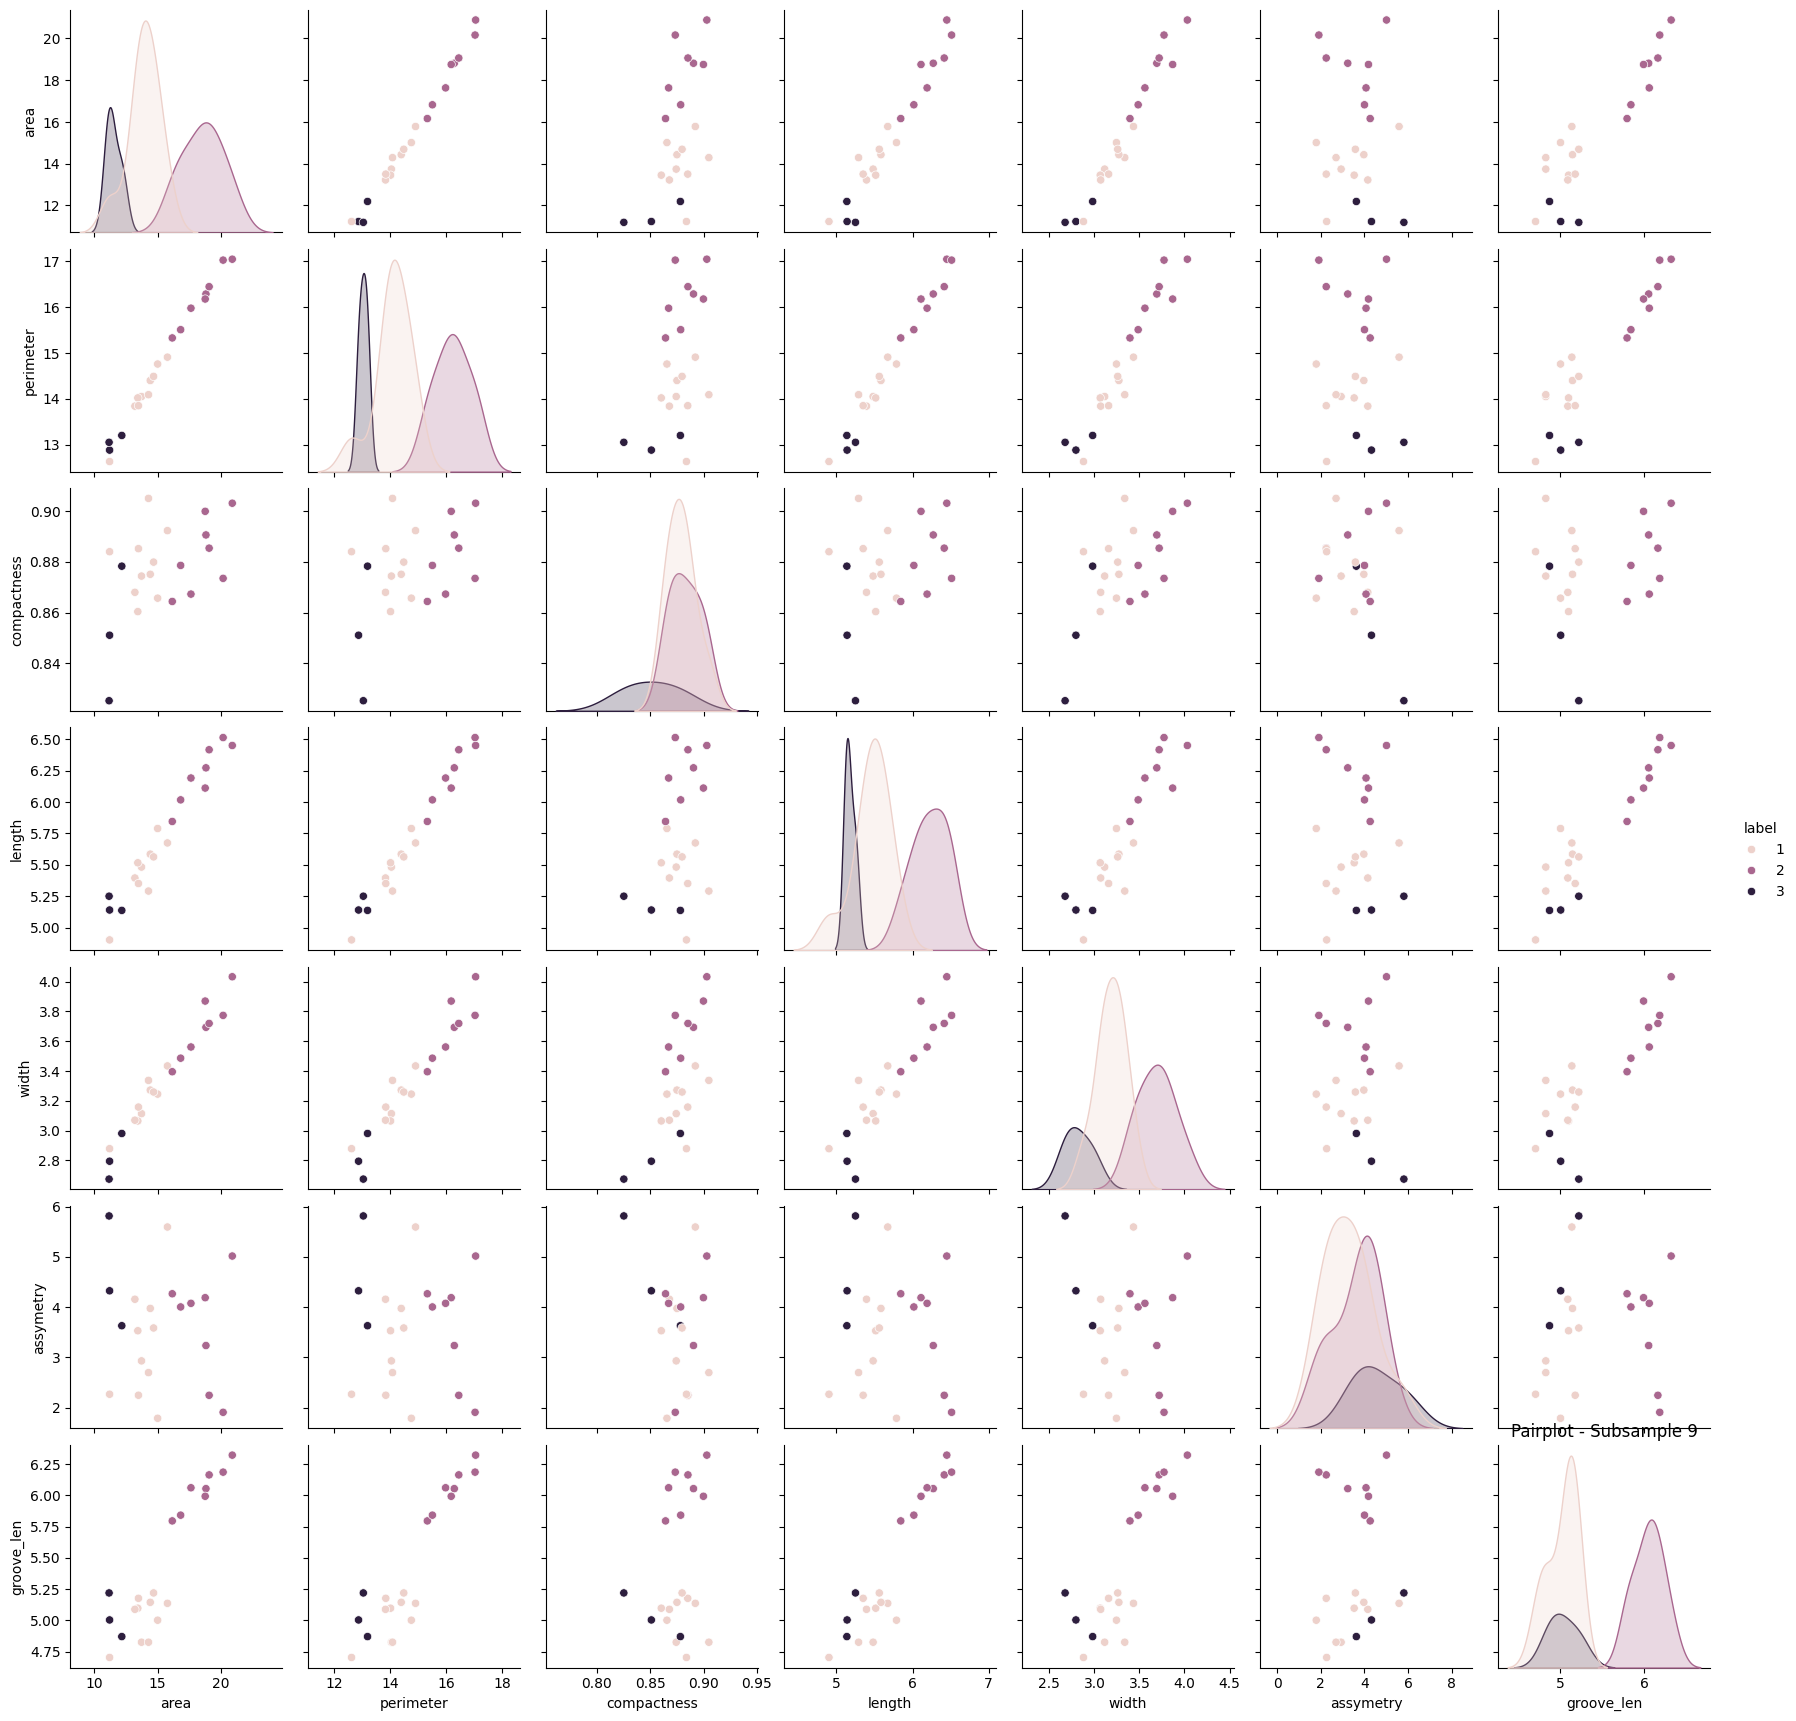

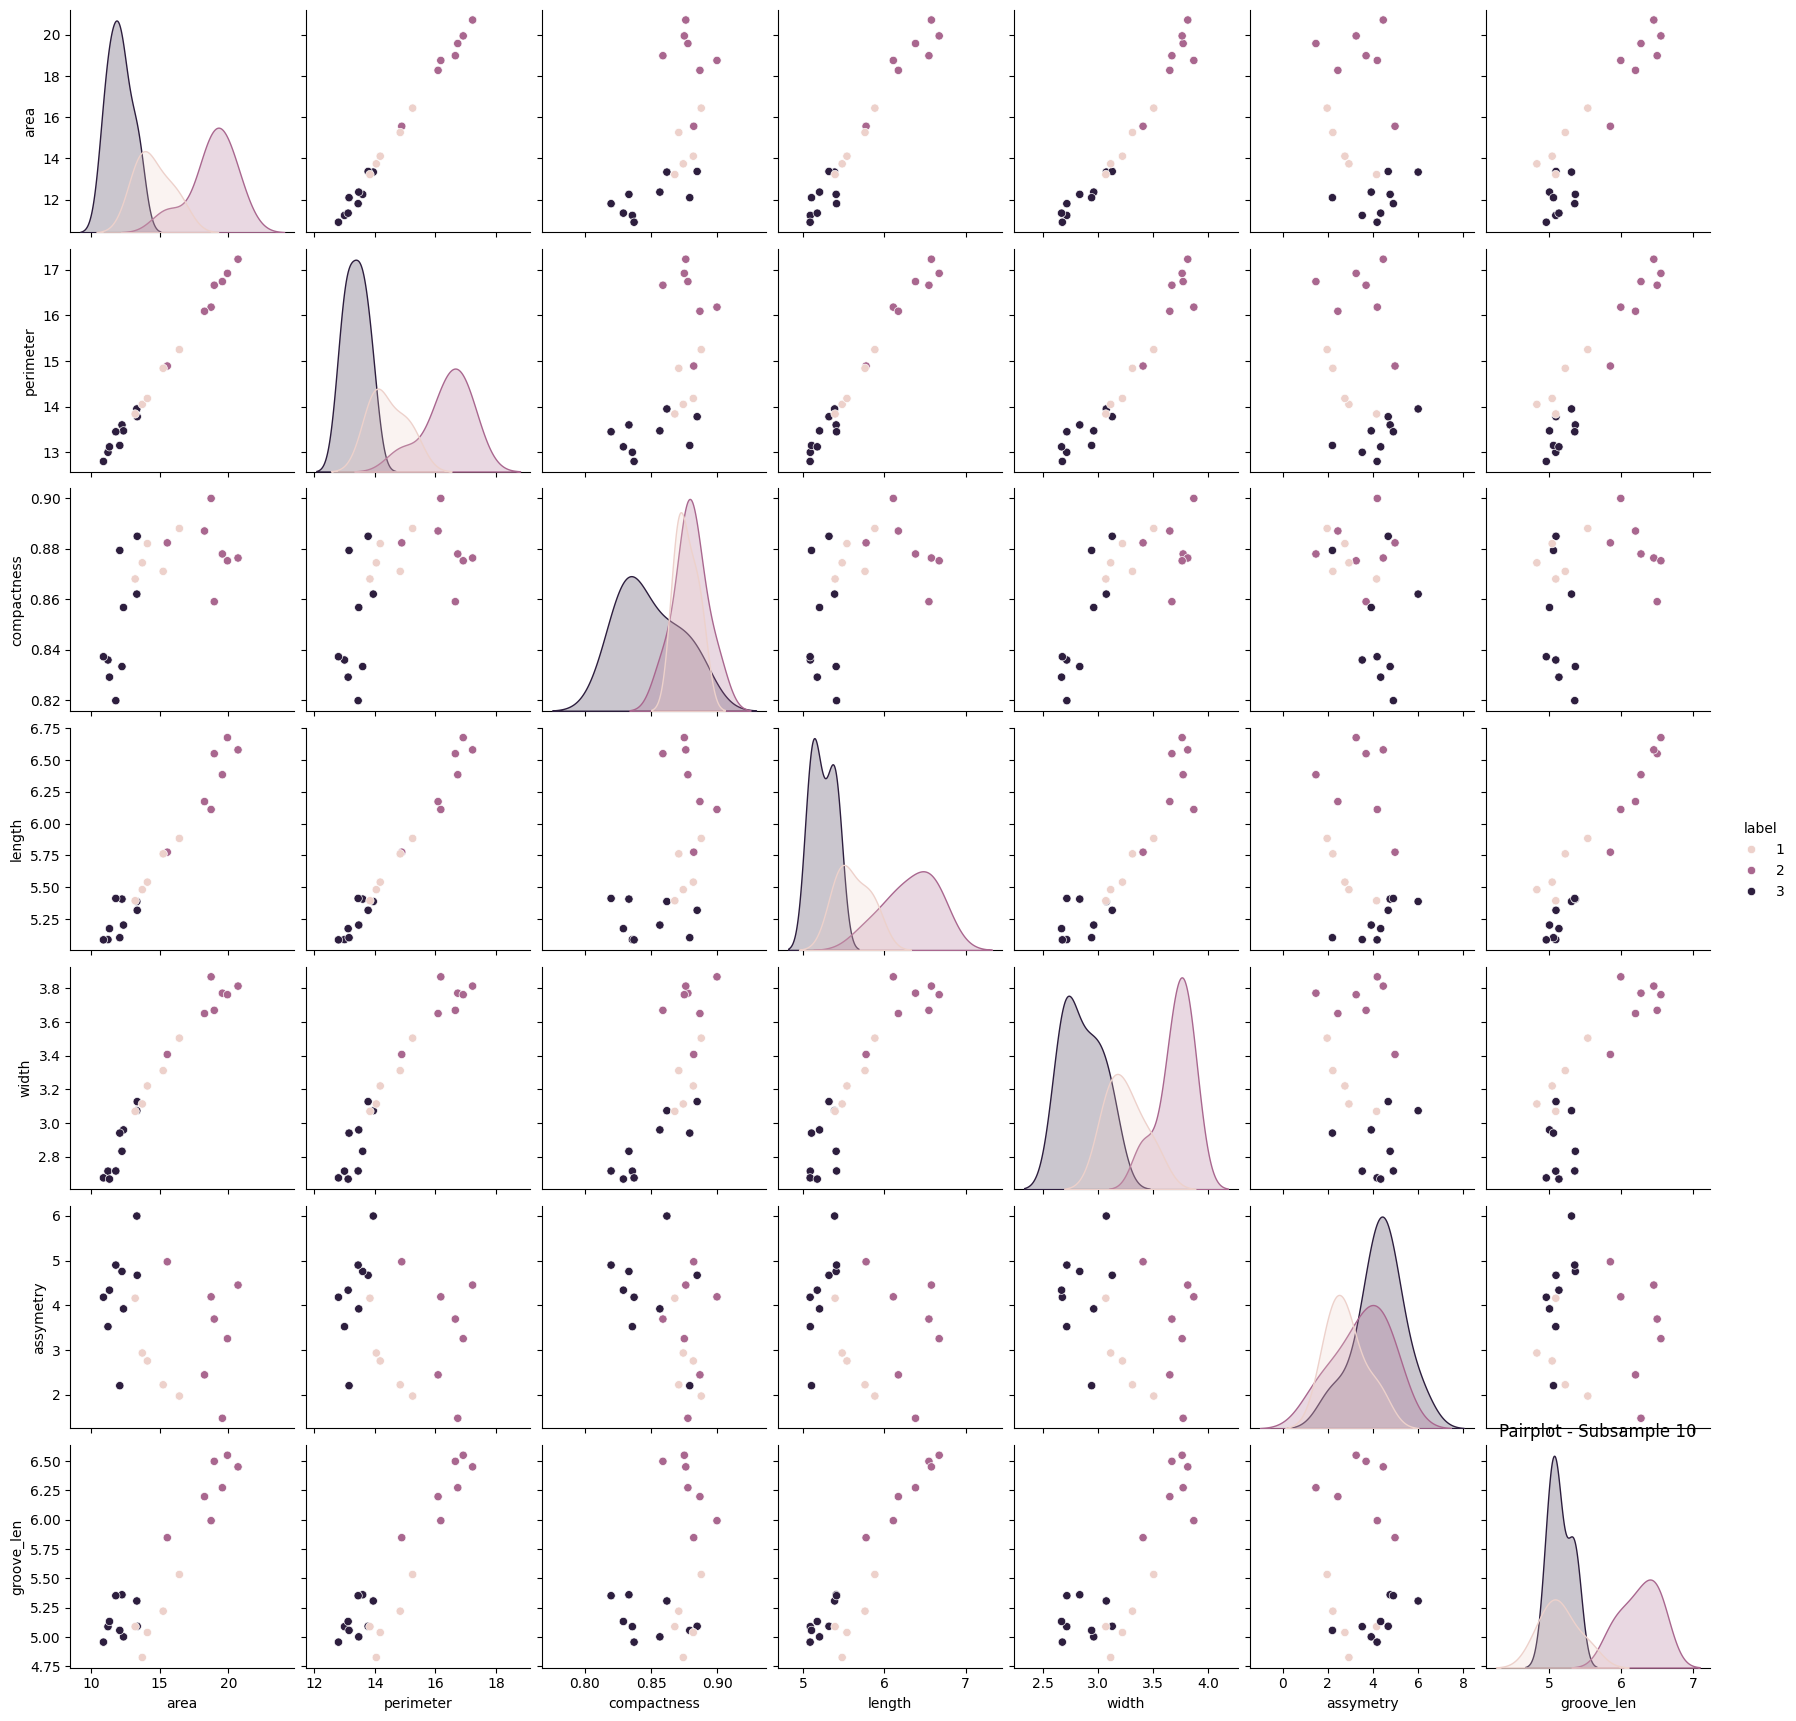

In [370]:
headers = df.columns[:-1]
target_variable = df.columns[-1]

for i in range(num_subsamples):
    subsample = df.sample(n=size)
    subsample_target = pd.concat([subsample[headers], subsample[target_variable]], axis=1)
    
    sns.pairplot(subsample_target, hue=target_variable)
    plt.title(f'Pairplot - Subsample {i+1}')
    plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

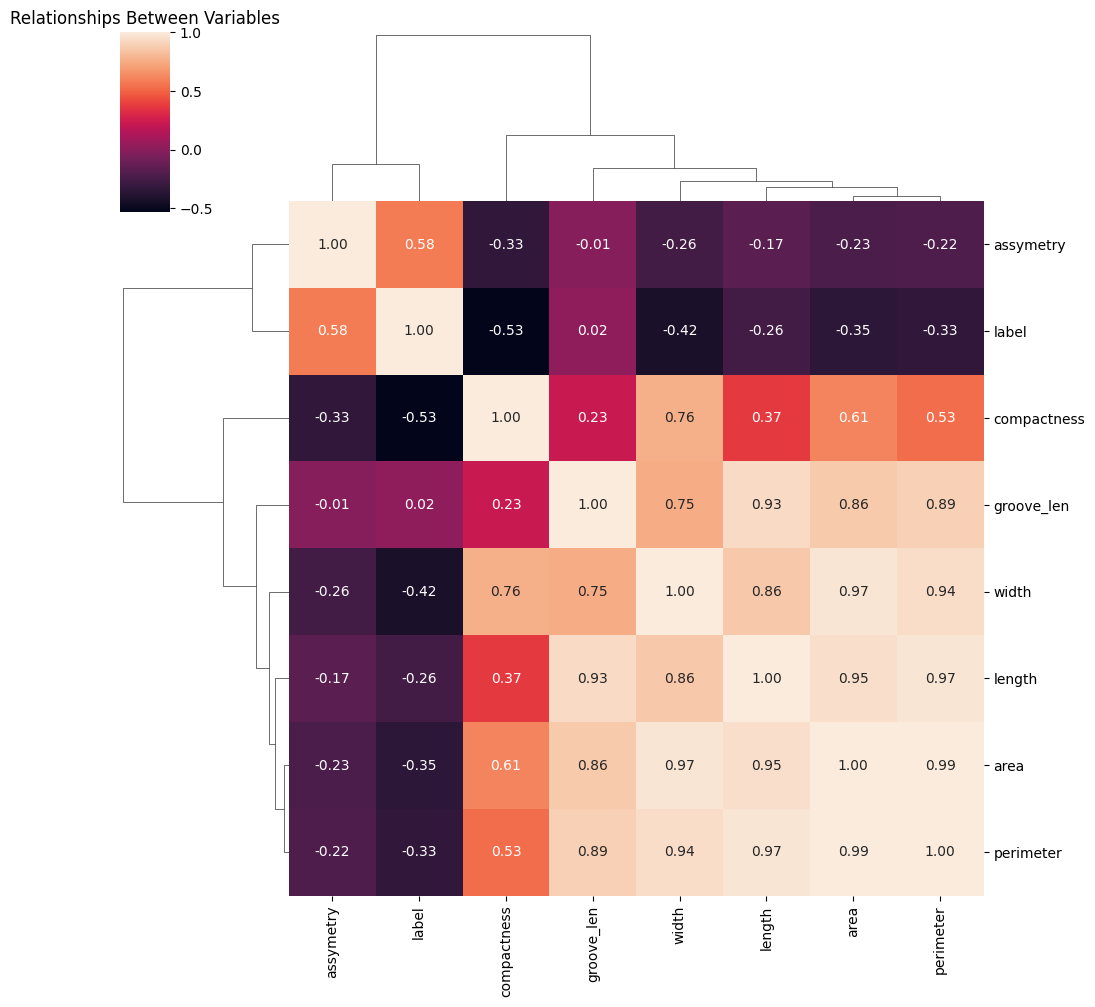

In [371]:
corr_matrix = df.corr()

sns.clustermap(corr_matrix, annot=True, fmt=".2f")
plt.title('Relationships Between Variables')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

- Perform SVM Modelling

In [372]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [373]:
y = df['label']
X = df.drop('label',axis=1) 

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [375]:
model = SVC(kernel='linear', C=0.05)
model.fit(X_train, y_train)

SVC(C=0.05, kernel='linear')

- Check Model's Performance

In [376]:
y_pred = model.predict(X_test)

In [377]:
confusion_matrix(y_test, y_pred)

array([[11,  1,  1],
       [ 4, 12,  0],
       [ 0,  0, 13]], dtype=int64)

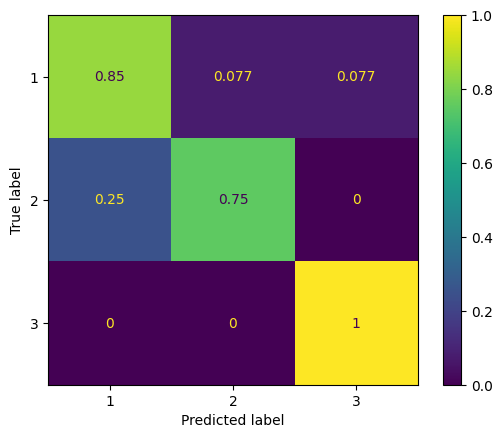

In [378]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,normalize='true')

In [379]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.85      0.79        13
           2       0.92      0.75      0.83        16
           3       0.93      1.00      0.96        13

    accuracy                           0.86        42
   macro avg       0.86      0.87      0.86        42
weighted avg       0.87      0.86      0.86        42



- Improve Model Performance with GridSearch

In [380]:
svm = SVC()
param_grid = {'C':[0.01, 0.05, 0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [381]:
grid.fit(X_test, y_test)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [382]:
grid.best_score_

0.9027777777777779

In [383]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

- Using Recommended Parameters from GridSearch

In [384]:
model = SVC(kernel='linear', C=0.01)
model.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

- Checking the Current Performance

In [385]:
y_pred = model.predict(X_test)

In [386]:
confusion_matrix(y_test, y_pred)

array([[11,  1,  1],
       [ 4, 12,  0],
       [ 0,  0, 13]], dtype=int64)

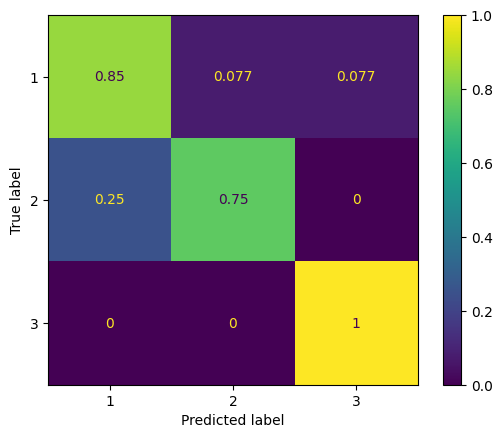

In [387]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,normalize='true')

In [388]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.85      0.79        13
           2       0.92      0.75      0.83        16
           3       0.93      1.00      0.96        13

    accuracy                           0.86        42
   macro avg       0.86      0.87      0.86        42
weighted avg       0.87      0.86      0.86        42

